# Ada - Milestone 2
## 1. Preliminary data analysis
### Dataset: Beer reviews

### Understand data structure inside datasets
(From referenced paper in google sheets)

- Five stars / five-aspect rating system: **feel, look, smell, taste & overall**
- BA: 33 387 users, 66 051 beers, 1 586 259 reviews
- RB: 40 213 users, 110 419 beers, 2 924 127 reviews

'ba' system | 'rb' system
:----------:|:-----------:
![](./data/img/ba_rating_system.png) | ![](./data/img/rb_rating_system.png)

For both systems: 'rating' column (final score) is automatically generated based on the five aspects


In [85]:
# General libraries
import pandas as pd
import numpy as np
import os

# NLP libraries
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *

# Geospatial analysis
import geopandas as gpd

# Visualization libraries
import matplotlib.pyplot as plt
import importlib
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from ipywidgets import IntSlider

# import utils files
import src.utils.data_utils as data_utils
import src.utils.geospatial_utils as geospatial_utils
importlib.reload(data_utils)

DATA_FOLDER = "../data/"


if you haven't yet, download the stopwrds and punkt_tab by running the following cell. It will be useful for the following analysis

In [ ]:
nltk.download('stopwords')
nltk.download('punkt_tab')

## 1.1 Exploration of all datasets from RateBeer and BeerReview
### 1.1.1 beers.csv file

In [48]:
##Reading the beer.csv file as a dataframe
beers_df = pd.read_csv(os.path.join(DATA_FOLDER, 'matched_beer_data/beers.csv'), low_memory=False)

##Make a copy of the beers_df, rename the column names and remove the first row indexed with 0 since it is now merged in the column names
beers_df_copy=beers_df.copy()
beers_df_copy= beers_df_copy.rename(columns={'ba': 'ba_abv', 'ba.1': 'ba_avg', 'ba.2': 'ba_avg_computed', 'ba.3': 'ba_avg_matched_valid_ratings', 'ba.4': 'ba_score', 
                                             'ba.5': 'ba_beer_id', 'ba.6': 'ba_beer_name', 'ba.7': 'ba_beer_wout_brewery_name','ba.8':'ba_brewery_id',
                                             'ba.9': 'ba_brewery_name','ba.10': 'ba_bros_score', 'ba.11': 'ba_nbr_matched_valid_ratings', 'ba.12': 'ba_nbr_ratings', 
                                             'ba.13': 'ba_nbr_reviews', 'ba.14': 'ba_style', 'ba.15': 'ba_zscore', 
                                             'rb': 'rb_abv','rb.1': 'rb_avg', 'rb.2': 'rb_avg_computed', 'rb.3': 'rb_avg_matched_valid_ratings', 'rb.4': 'rb_beer_id', 
                                             'rb.5': 'rb_beer_name', 'rb.6': 'rb_beer_wout_brewery_name', 'rb.7': 'rb_brewery_id', 'rb.8': 'rb_brewery_name', 
                                             'rb.9': 'rb_nbr_matched_valid_ratings', 'rb.10': 'rb_nbr_ratings', 'rb.11': 'rb_overall_score', 'rb.12': 'rb_style', 
                                             'rb.13': 'rb_style_score', 'rb.14': 'rb_zscore', 'scores': 'scores_diff', 'scores.1': 'scores_sim'}) 
beers_df_copy = beers_df_copy.drop(index=0)
beers_df_copy = beers_df_copy.reset_index(drop=True)

##Remove some columns that are not relevant for the scope of our project
beers_df_copy= beers_df_copy.drop(columns=['ba_avg_computed', 'ba_beer_id', 'ba_beer_wout_brewery_name',
                                            'ba_brewery_id', 'rb_avg_computed', 'rb_beer_id', 'scores_diff', 'scores_sim'])

display(beers_df_copy.head())
print('The shape of the dataframe for the beers.csv file is:', beers_df.shape)


,ba_abv,ba_avg,ba_avg_matched_valid_ratings,ba_score,ba_beer_name,ba_brewery_name,ba_bros_score,ba_nbr_matched_valid_ratings,ba_nbr_ratings,ba_nbr_reviews,...,rb_beer_name,rb_beer_wout_brewery_name,rb_brewery_id,rb_brewery_name,rb_nbr_matched_valid_ratings,rb_nbr_ratings,rb_overall_score,rb_style,rb_style_score,rb_zscore
0,4.8,3.45,3.504067796610169,80.0,Legbiter,Strangford Lough Brewing Company Ltd,80.0,59,75,59,...,Strangford Lough Legbiter,Legbiter,4959,Strangford Lough,89,89,23.0,Golden Ale/Blond Ale,27.0,-0.69830388113311
1,6.0,3.86,3.768333333333333,NaN,St. Patrick's Ale,Strangford Lough Brewing Company Ltd,NaN,6,8,6,...,Strangford Lough St. Patricks Ale,Patricks Ale St,4959,Strangford Lough,11,11,52.0,Irish Ale,79.0,0.005754083235128498
2,4.2,3.56,3.580416666666667,82.0,St. Patrick's Best,Strangford Lough Brewing Company Ltd,90.0,48,64,48,...,Strangford Lough St. Patricks Best,Patricks Best St,4959,Strangford Lough,74,74,26.0,Bitter,25.0,-0.8621191741786616
3,4.8,3.96,3.96,NaN,St. Patrick's Gold,Strangford Lough Brewing Company Ltd,NaN,1,1,1,...,Strangford Lough St. Patricks Gold,Patricks Gold St,4959,Strangford Lough,4,4,NaN,Amber Ale,NaN,-0.7584908630826819
4,4.5,NaN,NaN,NaN,Sheelin Stout,The Sheelin Brewery,NaN,0,0,0,...,Sheelin Stout,Stout,17616,Sheelin,2,2,NaN,Mild Ale,NaN,-0.34727103754736977


The shape of the dataframe for the beers.csv file is: (45641, 33)


In [49]:
##Check for which columns there are NaN values
display(beers_df_copy.isna().any())

ba_abv                          False
ba_avg                           True
ba_avg_matched_valid_ratings     True
ba_score                         True
ba_beer_name                    False
ba_brewery_name                 False
ba_bros_score                    True
ba_nbr_matched_valid_ratings    False
ba_nbr_ratings                  False
ba_nbr_reviews                  False
ba_style                        False
ba_zscore                        True
rb_abv                          False
rb_avg                           True
rb_avg_matched_valid_ratings     True
rb_beer_name                    False
rb_beer_wout_brewery_name       False
rb_brewery_id                   False
rb_brewery_name                 False
rb_nbr_matched_valid_ratings    False
rb_nbr_ratings                  False
rb_overall_score                 True
rb_style                        False
rb_style_score                   True
rb_zscore                        True
dtype: bool

Comments: 
- There are several columns having NaN values for both websites Beer Advocate (BA) and Rate Beer (RB). 
- Most of these columns corresponds to different scores such as ba_score, ba_bros_score, rb_overall_score, rb_style_score, etc

In [50]:
##Make a new dataframe with columns style, score and source (ba or rb)
beers_subset_df= pd.melt(beers_df_copy[['ba_score', 'ba_style', 'rb_overall_score', 'rb_style']], 
                    id_vars=['ba_style', 'rb_style'], 
                    value_vars=['ba_score', 'rb_overall_score'],
                    var_name='source', 
                    value_name='score')
beers_subset_df['source'] = beers_subset_df['source'].replace({'ba_score': 'BA', 'rb_overall_score': 'RB'})
beers_subset_df['style'] = beers_subset_df.apply(lambda row: row['ba_style'] if row['source'] == 'BA' else row['rb_style'], axis=1)
beers_subset_df = beers_subset_df.drop(columns=['ba_style', 'rb_style'])
beers_subset_df['score'] = pd.to_numeric(beers_subset_df['score'], errors='coerce')
beers_subset_df = beers_subset_df.dropna()
beers_subset_df = beers_subset_df.reset_index()

##Group by style and check if each style has both 'BA' and 'RB' sources and filter to keep only styles that have scores from both 'BA' and 'RB'
styles_with_both_sources = beers_subset_df.groupby('style')['source'].nunique() == 2
beers_subset_df = beers_subset_df[beers_subset_df['style'].isin(styles_with_both_sources[styles_with_both_sources].index)]
display(beers_subset_df.head())

##Get unique styles and count them
unique_styles = beers_subset_df['style'].unique()
num_styles = len(unique_styles)
print("Number of unique styles that have scores from both website BA and RB and no NaN values is:", num_styles)

,index,source,score,style
0,0,BA,80.00,English Pale Ale
15,267,BA,85.00,English Pale Ale
16,276,BA,85.00,English Pale Ale
18,286,BA,84.00,Scottish Ale
21,309,BA,91.00,Old Ale


Number of unique styles that have scores from both website BA and RB and no NaN values is: 14


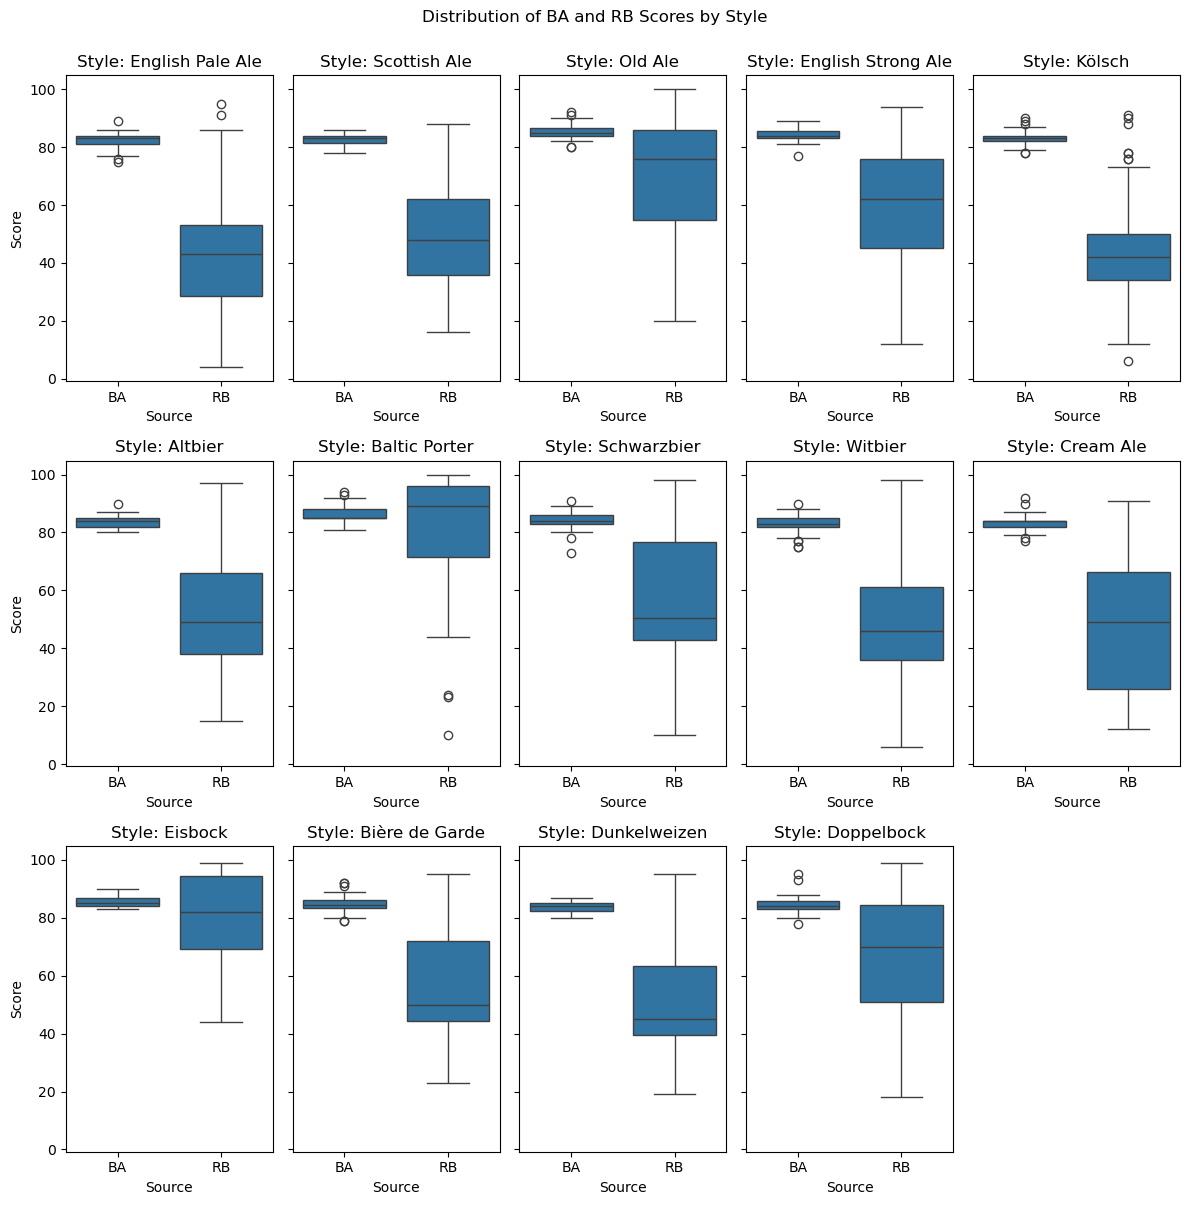

In [51]:
## Plot the distribution of the BA and RB scores only for styles having scores form both websites
ncols = 5
nrows = int(np.ceil(num_styles / ncols))
fig, axes = plt.subplots(nrows, ncols, figsize=(12, 4 * nrows), sharey=True)
axes = axes.flatten()
for i, style in enumerate(unique_styles):
    sns.boxplot(data=beers_subset_df.loc[beers_subset_df['style'] == style], x='source', y='score', ax=axes[i])
    axes[i].set_title(f"Style: {style}")
    axes[i].set_xlabel("Source")
    axes[i].set_ylabel("Score")
#Hide any unused axes if num_styles is less than total subplot slots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.suptitle("Distribution of BA and RB Scores by Style", y=1)
plt.tight_layout()
plt.show()

Comments:
- Here we plotted the distribution of the score for BA and the overall score for RB to explore how these different scores vary in both websites. 
- These subplots show that the score from BA are spanned over a smaller range compared to the overall_score from RB. 
- The RB score varies more significantly across the different styles compared to BA score!

### 1.1.2 breweries.csv files

In [53]:
##Reading the breweries.csv file as a dataframe
breweries_df = pd.read_csv(os.path.join(DATA_FOLDER,'matched_beer_data/breweries.csv'), low_memory=False)

##Make a copy of the breweries_df, rename the column names and remove the first row indexed with 0 since it is now merged in the column names
breweries_df_copy=breweries_df.copy()
breweries_df_copy= breweries_df_copy.rename(columns={'ba': 'ba_brewery_id', 'ba.1': 'ba_location', 'ba.2': 'ba_brewery_name', 'ba.3': 'ba_nbr_beers', 
                                             'rb': 'rb_brewery_id','rb.1': 'rb_location', 'rb.2': 'rb_brewery_name', 'rb.3': 'rb_nbr_beers', 'scores': 'scores_diff', 'scores.1': 'scores_sim'}) 
breweries_df_copy = breweries_df_copy.drop(index=0)
breweries_df_copy = breweries_df_copy.reset_index(drop=True)

##Remove some columns that are not relevant for the scope of our project
breweries_df_copy= breweries_df_copy.drop(columns=['ba_brewery_id', 'rb_brewery_id', 'scores_diff', 'scores_sim'])

display(breweries_df_copy.head())
print('The shape of the dataframe for the beers.csv file is:', breweries_df_copy.shape)

,ba_location,ba_brewery_name,ba_nbr_beers,rb_location,rb_brewery_name,rb_nbr_beers
0,Northern Ireland,Strangford Lough Brewing Company Ltd,5,Northern Ireland,Strangford Lough,5
1,Northern Ireland,The Sheelin Brewery,4,Northern Ireland,Sheelin,2
2,Northern Ireland,Walled City Brewing Company,6,Northern Ireland,Walled City,3
3,Northern Ireland,Ards Brewing Company,7,Northern Ireland,Ards Brewing Co.,13
4,Northern Ireland,Barrahooley Brewery,3,Northern Ireland,Barrahooley Craft Brewery,4


The shape of the dataframe for the beers.csv file is: (8281, 6)


,location,number_of_breweries_per_location_ba,number_of_breweries_per_location_rb
51,Germany,530,530
40,England,482,482
151,"United States, California",454,454
20,Canada,407,407
152,"United States, Colorado",233,233


IntSlider(value=10, description='Top N Countries', max=205, min=1)

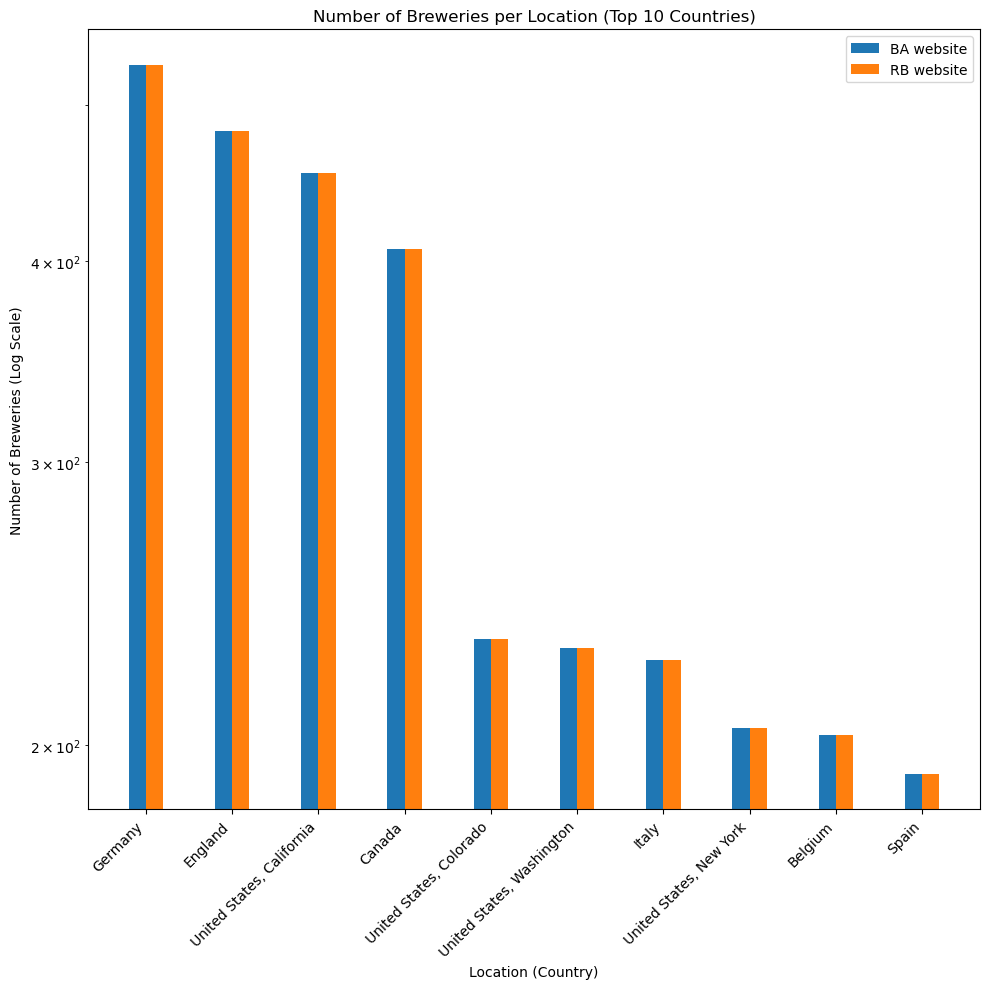

In [86]:
##Group by ba_location and count breweries
ba_counts = breweries_df_copy.groupby('ba_location')['ba_brewery_name'].count().reset_index()
ba_counts.columns = ['location', 'number_of_breweries_per_location_ba']

##Group by rb_location and count breweries  
rb_counts =breweries_df_copy.groupby('rb_location')['rb_brewery_name'].count().reset_index()
rb_counts.columns = ['location', 'number_of_breweries_per_location_rb']

##Combine the results of both ba and rb
result_df = pd.merge(ba_counts, rb_counts, on='location')
result_df = result_df.sort_values(by='number_of_breweries_per_location_ba', ascending=False)
display(result_df.head())

##Function to plot the number of breweries per location
def plot_top_n_breweries(n):
    # Select top N locations
    top_result_df = result_df.nlargest(n, 'number_of_breweries_per_location_ba')

    # Plotting
    x = np.arange(len(top_result_df))
    width = 0.2
    plt.figure(figsize=(10, 10))
    plt.bar(x - width/2, top_result_df['number_of_breweries_per_location_ba'], width, label='BA website')
    plt.bar(x + width/2, top_result_df['number_of_breweries_per_location_rb'], width, label='RB website')
    plt.yscale('log')
    plt.title(f'Number of Breweries per Location (Top {n} Countries)')
    plt.xlabel('Location (Country)')
    plt.ylabel('Number of Breweries (Log Scale)')
    plt.xticks(x, top_result_df['location'], rotation=45, ha='right', fontsize=10)
    plt.legend()
    plt.tight_layout()
    plt.show()

##Create a slider to select the number of top countries and display it
# n_slider = widgets.IntSlider(value=10, min=1, max=result_df['location'].unique().size, step=1, description="Top N Countries")
# widgets.interactive(plot_top_n_breweries, n=n_slider)

# Initialize the slider and display the slider to manually select the value (only in Jupyter Notebooks)
n_slider = IntSlider(value=10, min=1, max=result_df['location'].nunique(), step=1, description="Top N Countries")
display(n_slider)

# Use the slider’s value as input to the function
plot_top_n_breweries(n_slider.value)

Comments:
- The plot above shows the distribution of the number of breweries per country for both BA and RB websites in a descendant way.
- We can also notice that the number is the same for both websites across all countries. 

### 1.1.3 ratings.csv file

In [57]:
##Reading the ratings.csv file as a dataframe
ratings_df = pd.read_csv(os.path.join(DATA_FOLDER, 'matched_beer_data/ratings.csv'), low_memory=False)

##Make a copy of the ratings_df, rename the column names and remove the first row indexed with 0 since it is now merged in the column names
ratings_df_copy=ratings_df.copy()
ratings_df_copy= ratings_df_copy.rename(columns={'ba': 'ba_abv', 'ba.1': 'ba_appearance', 'ba.2': 'ba_aroma', 'ba.3': 'ba_beer_id', 'ba.4': 'ba_beer_name', 
                                                'ba.5': 'ba_brewery_id', 'ba.6': 'ba_brewery_name', 'ba.7': 'ba_date', 'ba.8': 'ba_overall', 'ba.9': 'ba_palate',
                                                'ba.10': 'ba_rating', 'ba.11': 'ba_review', 'ba.12': 'ba_style', 'ba.13': 'ba_taste', 'ba.14': 'ba_text', 
                                                'ba.15': 'ba_user_id', 'ba.16': 'ba_user_name', 'rb': 'rb_abv', 'rb.1': 'rb_appearance', 'rb.2': 'rb_aroma', 
                                                'rb.3': 'rb_beer_id', 'rb.4': 'rb_beer_name', 'rb.5': 'rb_brewery_id', 'rb.6': 'rb_brewery_name', 'rb.7': 'rb_date', 
                                                'rb.8': 'rb_overall', 'rb.9': 'rb_palate', 'rb.10': 'rb_rating', 'rb.11': 'rb_style', 'rb.12': 'rb_taste', 'rb.13': 'rb_text', 
                                                'rb.14': 'rb_user_id', 'rb.15': 'rb_user_name'}) 
ratings_df_copy = ratings_df_copy.drop(index=0)
ratings_df_copy = ratings_df_copy.reset_index(drop=True)

##Remove some columns that are not relevant for the scope of our project
ratings_df_copy= ratings_df_copy.drop(columns=['ba_beer_id', 'ba_brewery_id', 'ba_user_id', 'rb_beer_id', 'rb_brewery_id', 'rb_user_id'])

##Convert the date columns of both ba and rb to readable dates
ratings_df_copy['ba_date'] = pd.to_datetime(pd.to_numeric(ratings_df_copy['ba_date'], errors='coerce'), unit='s')
ratings_df_copy['rb_date'] = pd.to_datetime(pd.to_numeric(ratings_df_copy['rb_date'],errors='coerce'), unit='s')

display(ratings_df_copy.head())
print('The shape of the dataframe for the beers.csv file is:', ratings_df_copy.shape)


,ba_abv,ba_appearance,ba_aroma,ba_beer_name,ba_brewery_name,ba_date,ba_overall,ba_palate,ba_rating,ba_review,...,rb_beer_name,rb_brewery_name,rb_date,rb_overall,rb_palate,rb_rating,rb_style,rb_taste,rb_text,rb_user_name
0,11.3,4.5,4.5,Trappistes Rochefort 10,Brasserie de Rochefort,2011-12-25 11:00:00,5.0,4.5,4.8,True,...,Rochefort Trappistes 10,Brasserie Rochefort,2013-12-22 11:00:00,19.0,4.0,4.6,Abt/Quadrupel,9.0,a) Geruch malzig-schwer-sÃ¼Ã. Riecht schon ...,Erzengel
1,5.0,NaN,NaN,Myanmar Lager Beer,Myanmar Brewery and Distillery,2011-11-30 11:00:00,NaN,NaN,3.0,True,...,Myanmar Lager Beer,Myanmar Brewery and Distillery,2011-11-29 11:00:00,6.0,2.0,1.7,Pale Lager,4.0,"Can. Weak and watery, not the best beer of the...",visionthing
2,5.0,3.5,3.5,Cantillon Tyrnilambic Baie D’Argousier Lambic,Brasserie Cantillon,2012-08-04 10:00:00,4.0,4.0,3.85,True,...,Cantillon Tyrnilambic Baie dArgousier,Cantillon,2012-11-22 11:00:00,17.0,4.0,4.1,Lambic Style - Fruit,8.0,"Bottle @ One Pint Pub, Helsinki. Originally ra...",tiong
3,5.0,4.0,3.5,Cantillon Pikkulinnun Viskilambic,Brasserie Cantillon,2012-08-04 10:00:00,4.0,4.0,3.68,True,...,Cantillon Pikkulinnun Viskilambic,Cantillon,2014-11-17 11:00:00,16.0,4.0,4.1,Lambic Style - Unblended,9.0,"Draught @Â Pikkulintu, Helsinki, Finland. A pr...",tiong
4,6.0,4.0,4.0,Drie Fonteinen Oude Geuze - Armand & Tommy,Brouwerij 3 Fonteinen,2012-08-29 10:00:00,4.0,4.0,4.0,True,...,3 Fonteinen Oude Geuze (Armand & Tommy),Brouwerij 3 Fonteinen,2012-08-18 10:00:00,16.0,4.0,4.0,Lambic Style - Gueuze,8.0,750ml bottleBottling date: 2011/02/17 - Pours ...,tiong


The shape of the dataframe for the beers.csv file is: (21964, 27)


In [58]:
##Check for which columns there are NaN values
display(ratings_df_copy.isna().any())

ba_abv             False
ba_appearance       True
ba_aroma            True
ba_beer_name       False
ba_brewery_name    False
ba_date            False
ba_overall          True
ba_palate           True
ba_rating          False
ba_review          False
ba_style           False
ba_taste            True
ba_text             True
ba_user_name       False
rb_abv             False
rb_appearance      False
rb_aroma           False
rb_beer_name       False
rb_brewery_name    False
rb_date            False
rb_overall         False
rb_palate          False
rb_rating          False
rb_style           False
rb_taste           False
rb_text            False
rb_user_name       False
dtype: bool

Comments:
- For the BA website, we notice that the columns corresponding to the following categories scores 'appearance', 'aroma', 'palate', 'taste', overall score and text contain some NaN values. However, for the RB website there are no NaN values for the same type of beers and breweries. 

IntSlider(value=5, description='# of Styles:', max=104, min=1)

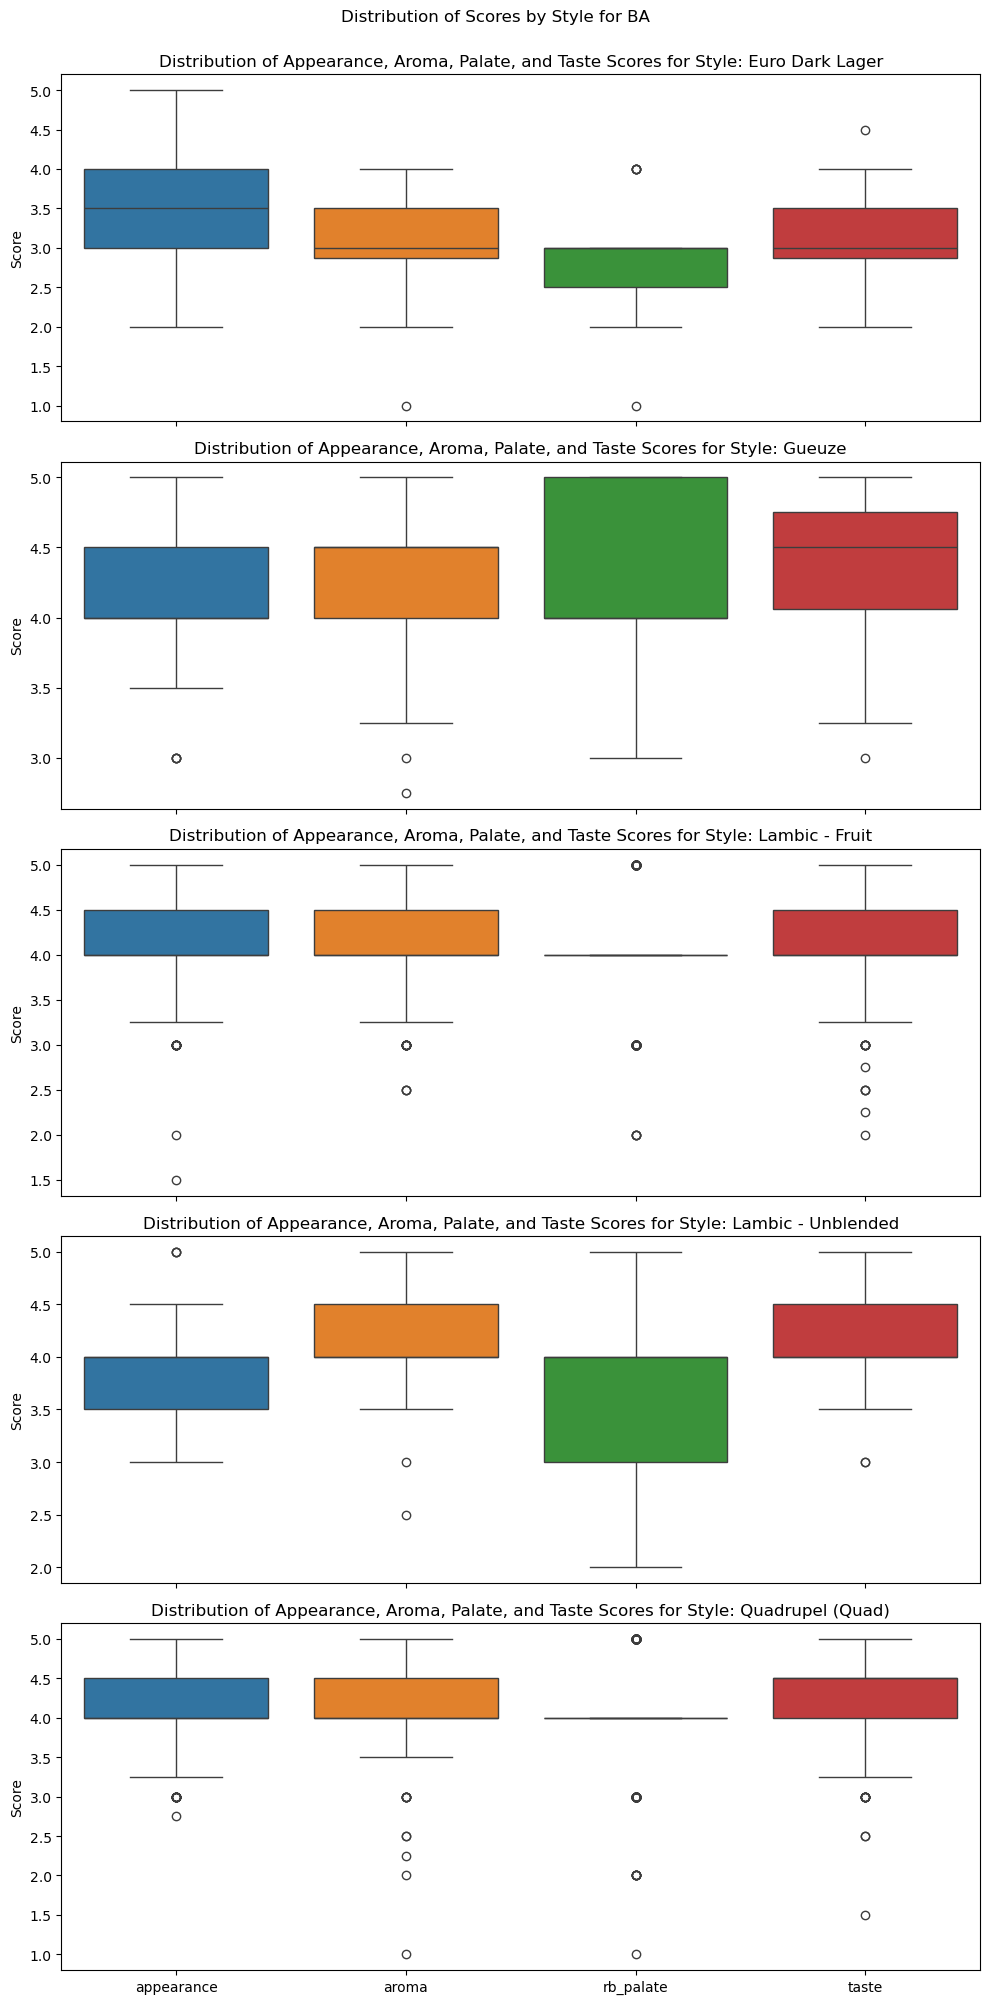

In [89]:
##Filter out rows with NaN values in relevant columns for RB website 
ratings_df_copy_nonan = ratings_df_copy.dropna(subset=['ba_appearance', 'ba_aroma', 'ba_palate', 'ba_taste'])
ratings_df_copy_nonan=ratings_df_copy_nonan.rename(columns={'ba_style': 'style'})

##Modify the DataFrame to have one column for the style, one for the category (appearance, aroma, etc.) and one for the score
ratings_df_copy_nonan_subset = ratings_df_copy_nonan.melt(id_vars=['style'], 
                             value_vars=['ba_appearance', 'ba_aroma', 'rb_palate', 'ba_taste'], 
                             var_name='category', 
                             value_name='score')
ratings_df_copy_nonan_subset['score'] = pd.to_numeric(ratings_df_copy_nonan_subset['score'], errors='coerce')
ratings_df_copy_nonan_subset['category'] = ratings_df_copy_nonan_subset['category'].str.replace('ba_', '', regex=False)

def plot_styles(num_styles, website):
    # Get the top `num_styles`
    selected_styles = ratings_df_copy_nonan_subset['style'].unique()[:num_styles]
    df_selected_styles = ratings_df_copy_nonan_subset[ratings_df_copy_nonan_subset['style'].isin(selected_styles)]

    #Plotting
    fig, axes = plt.subplots(num_styles, 1, figsize=(10, num_styles * 4), sharex=True)
    for i, (style, group_data) in enumerate(df_selected_styles.groupby('style')):
        sns.boxplot(data=group_data, x='category', y='score', ax=axes[i], hue='category')
        axes[i].set_title(f"Distribution of Appearance, Aroma, Palate, and Taste Scores for Style: {style}")
        axes[i].set_xlabel("")
        axes[i].set_ylabel("Score")
        # axes[i].legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.suptitle(f"Distribution of Scores by Style for {website}", y=1)
    plt.tight_layout()
    plt.show()

# Initialize the slider and display the slider to manually select the value (only in Jupyter Notebooks)
n_slider_1 = IntSlider(value=5, min=1, max=len(ratings_df_copy_nonan_subset['style'].unique()), step=1, description='# of Styles:')
display(n_slider_1)

# Use the slider’s value as input to the function
plot_styles(n_slider_1.value,website='BA')


IntSlider(value=5, description='# of Styles:', max=79, min=1)

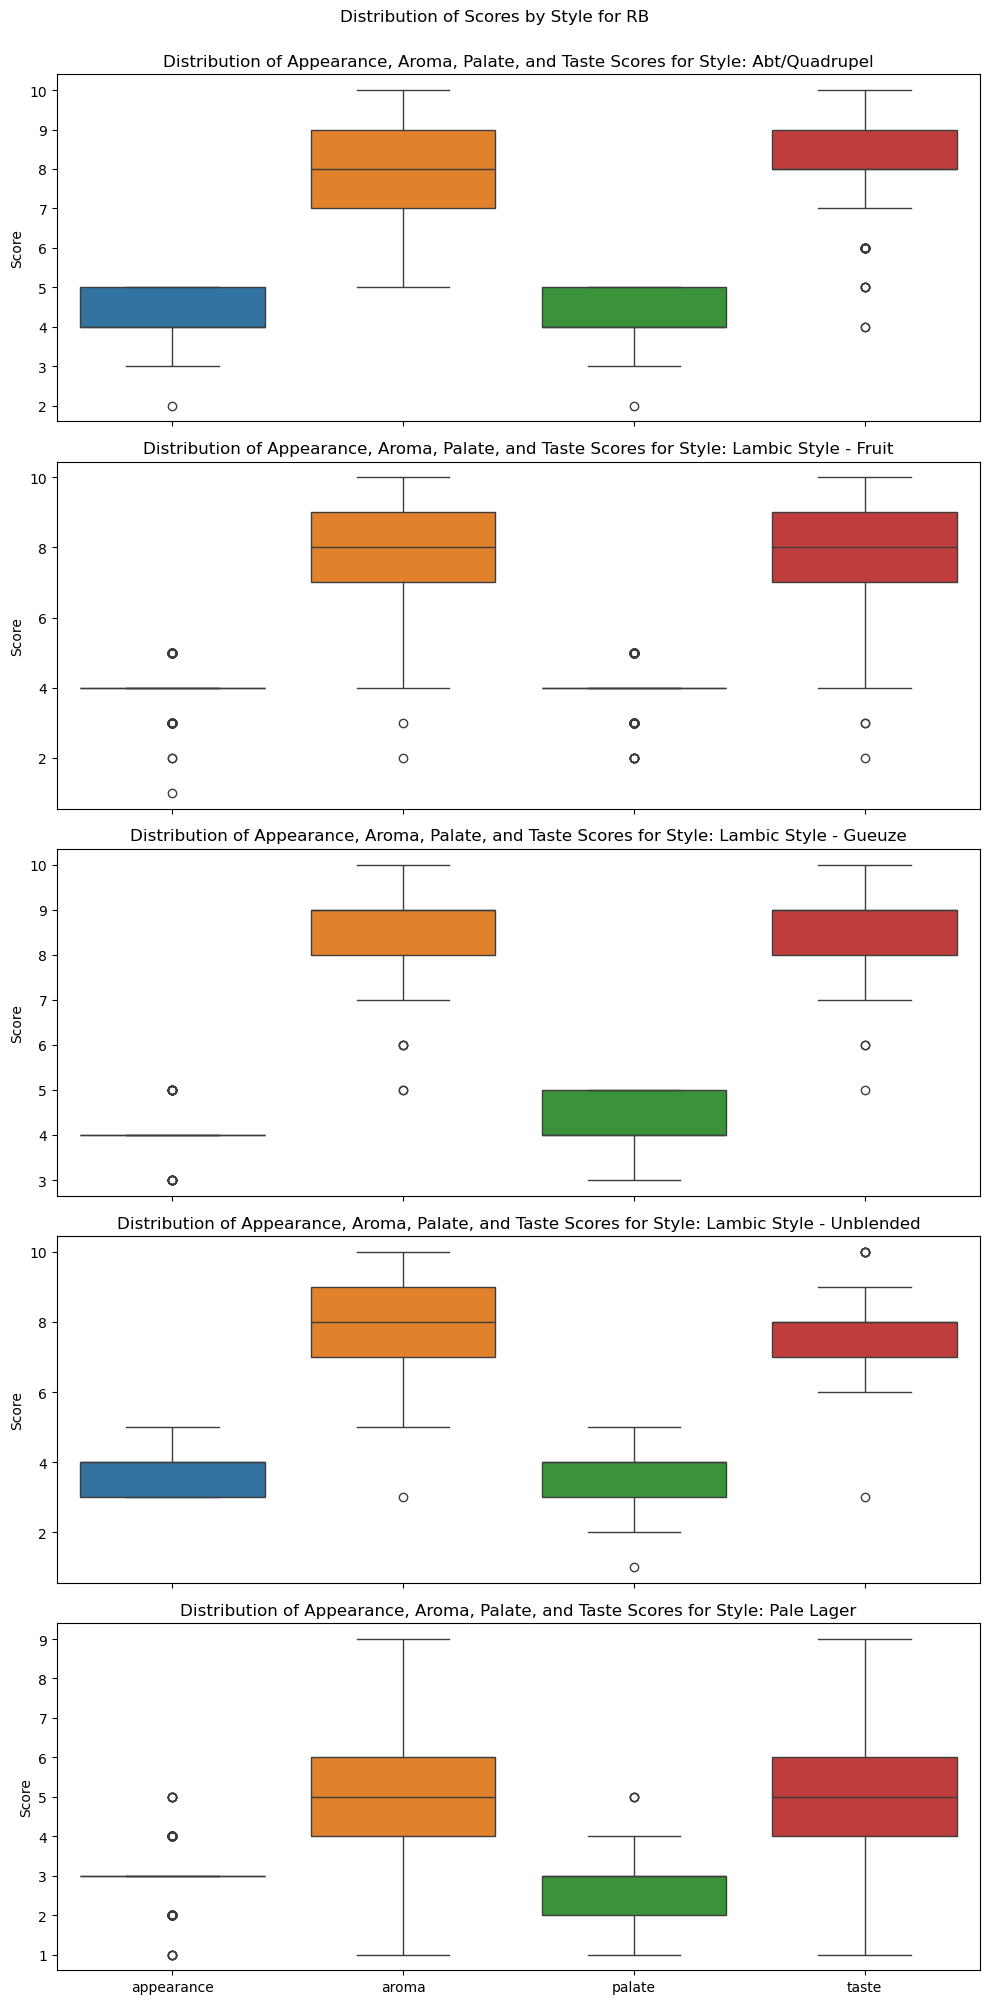

In [90]:
##Filter out rows with NaN values in relevant columns for RB website 
ratings_df_copy_nonan = ratings_df_copy.dropna(subset=['rb_appearance', 'rb_aroma', 'rb_palate', 'rb_taste'])
ratings_df_copy_nonan=ratings_df_copy_nonan.rename(columns={'rb_style': 'style'})

##Modify the DataFrame to have one column for the style, one for the category (appearance, aroma, etc.) and one for the score
ratings_df_copy_nonan_subset = ratings_df_copy_nonan.melt(id_vars=['style'], 
                             value_vars=['rb_appearance', 'rb_aroma', 'rb_palate', 'rb_taste'], 
                             var_name='category', 
                             value_name='score')

ratings_df_copy_nonan_subset['score'] = pd.to_numeric(ratings_df_copy_nonan_subset['score'], errors='coerce')
ratings_df_copy_nonan_subset['category'] = ratings_df_copy_nonan_subset['category'].str.replace('rb_', '', regex=False)

# Initialize the slider and display the slider to manually select the value (only in Jupyter Notebooks)
n_slider_2 = IntSlider(value=5, min=1, max=len(ratings_df_copy_nonan_subset['style'].unique()), step=1, description='# of Styles:')
display(n_slider_2)

# Use the slider’s value as input to the function
plot_styles(n_slider_2.value,website='RB')


Comments:
- These plots show the distribution of the scores for the different categories and for each beer style. 

### 1.1.4 user_approx.csv file

In [63]:
##Reading the users_approx.csv file as a dataframe
users_approx_df = pd.read_csv(os.path.join(DATA_FOLDER, 'matched_beer_data/users_approx.csv'), low_memory=False)

##Make a copy of the users_approx_df, rename the column names and remove the first row indexed with 0 since it is now merged in the column names
users_approx_df_copy=users_approx_df.copy()
users_approx_df_copy= users_approx_df_copy.rename(columns={'ba': 'ba_joined_date', 'ba.1': 'ba_location', 'ba.2': 'ba_nbr_ratings', 'ba.3': 'ba_nbr_reviews', 'ba.4': 'ba_user_id',
                                                            'ba.5': 'ba_user_name', 'ba.6': 'ba_user_name_lower', 'rb': 'rb_joined_date', 'rb.1': 'rb_location',
                                                            'rb.2': 'rb_nbr_ratings', 'rb.3': 'rb_user_id', 'rb.4': 'rb_user_name', 'rb.5': 'rb_user_name_lower', 'scores': 'rb_sim'}) 
users_approx_df_copy = users_approx_df_copy.drop(index=0)
users_approx_df_copy = users_approx_df_copy.reset_index(drop=True)
##Remove some columns that are not relevant for the scope of our project
users_approx_df_copy= users_approx_df_copy.drop(columns=['ba_joined_date', 'ba_user_name', 'ba_user_id', 'rb_joined_date' ,'rb_user_name', 'rb_user_id', 'rb_sim'])

display(users_approx_df_copy.head())
print('The shape of the dataframe for the beers.csv file is:', users_approx_df_copy.shape)

,ba_location,ba_nbr_ratings,ba_nbr_reviews,ba_user_name_lower,rb_location,rb_nbr_ratings,rb_user_name_lower
0,Spain,3,0,magicuenca,Spain,89,magicuenca91
1,Germany,6,6,erzengel,Germany,8781,erzengel
2,"United States, Virginia",1,1,gendv138,"United States, Virginia",6240,gendv138
3,"United States, Washington",3,3,nimbleprop,"United States, Washington",7452,nimbleprop
4,Estonia,11,0,visionthing,Estonia,5462,visionthing


The shape of the dataframe for the beers.csv file is: (3341, 7)


### 1.1.5  Merged dataframe from all four csv files above

In [64]:
##Merge beers.csv and breweries.csv on 'ba_brewery_name' to add 'ba_location' to beers.csv for BA website 
df_ba_subset = beers_df_copy[['ba_abv', 'ba_avg', 'ba_avg_matched_valid_ratings',
                            'ba_score', 'ba_beer_name', 'ba_brewery_name', 'ba_bros_score',
                            'ba_nbr_matched_valid_ratings', 'ba_nbr_ratings', 'ba_nbr_reviews',
                            'ba_style', 'ba_zscore']]
merged_df1 = pd.merge(df_ba_subset, breweries_df_copy[['ba_brewery_name', 'ba_location']], on='ba_brewery_name', how='left')

##Merge the resulting DataFrame with ratings.csv on 'ba_beer_name' and 'ba_brewery_name'
merged_df2 = pd.merge(merged_df1, ratings_df_copy_nonan[['ba_beer_name', 'ba_rating', 'ba_overall']], on='ba_beer_name', how='left')

##Select only the desired columns for the final DataFrame and set the scores to numeric type
final_df_ba = merged_df2[['ba_beer_name', 'ba_brewery_name', 'ba_location', 'ba_rating', 'ba_overall']]
final_df_ba.columns = ['beer_name', 'brewery_name', 'location', 'ba_rating', 'ba_overall']
final_df_ba.loc[:, 'ba_rating'] = pd.to_numeric(final_df_ba['ba_rating'], errors='coerce')
final_df_ba.loc[:, 'ba_overall'] = pd.to_numeric(final_df_ba['ba_overall'], errors='coerce')

##Remove rows with NaN values
final_df_ba = final_df_ba.dropna()
display(final_df_ba.head())


,beer_name,brewery_name,location,ba_rating,ba_overall
0,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,2.69,2.50
1,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,3.57,3.50
2,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,3.33,3.00
4,St. Patrick's Best,Strangford Lough Brewing Company Ltd,Northern Ireland,3.52,3.50
5,St. Patrick's Best,Strangford Lough Brewing Company Ltd,Northern Ireland,3.60,3.50


In [65]:
##Check if all values in the 'ba_rating' column are <= 5
all_less_equal_5_rating_ba = final_df_ba['ba_rating'].le(5).all()
print(all_less_equal_5_rating_ba)

# Check if all values in the 'ba_overall' column are <= 5
all_less_equal_5_overall_ba = final_df_ba['ba_overall'].le(5).all()
print(all_less_equal_5_overall_ba)

True
True


In [66]:
##Set a threshold to determine a good or a bad score
threshold_ba = 4 
##Create a new column with categories based on the condition for rating 
final_df_ba['rating_category'] = np.where(final_df_ba['ba_rating'] < threshold_ba, f'smaller than {threshold_ba}', f'bigger than {threshold_ba}')

##Create a new column with categories based on the condition for overall 
final_df_ba['overall_category'] = np.where(final_df_ba['ba_overall'] < threshold_ba, f'smaller than {threshold_ba}', f'bigger than {threshold_ba}')

##Reorder the columns 
final_df_ba = final_df_ba[['beer_name', 'brewery_name', 'location', 'ba_rating', 'rating_category', 'ba_overall', 'overall_category']]

display(final_df_ba.head())

,beer_name,brewery_name,location,ba_rating,rating_category,ba_overall,overall_category
0,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,2.69,smaller than 4,2.50,smaller than 4
1,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,3.57,smaller than 4,3.50,smaller than 4
2,Legbiter,Strangford Lough Brewing Company Ltd,Northern Ireland,3.33,smaller than 4,3.00,smaller than 4
4,St. Patrick's Best,Strangford Lough Brewing Company Ltd,Northern Ireland,3.52,smaller than 4,3.50,smaller than 4
5,St. Patrick's Best,Strangford Lough Brewing Company Ltd,Northern Ireland,3.60,smaller than 4,3.50,smaller than 4


IntSlider(value=10, description='Num Countries:', max=130, min=1, step=10)

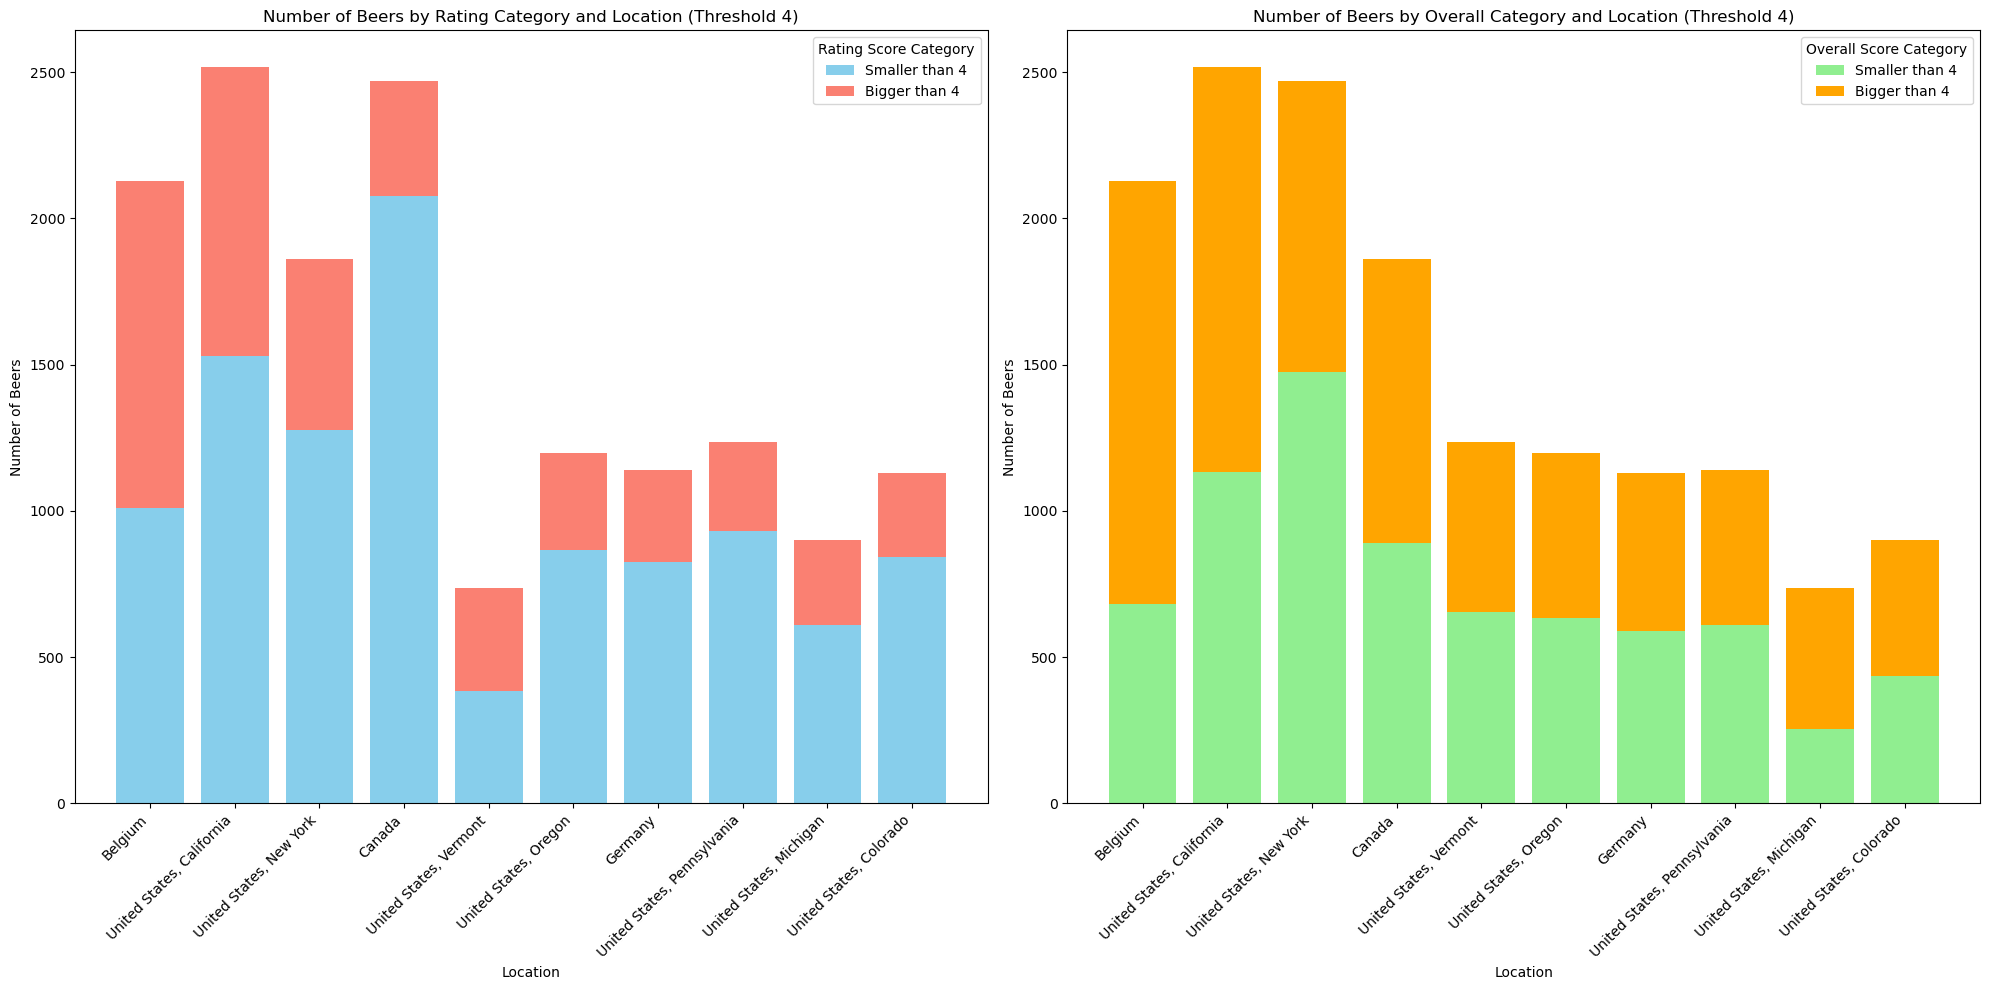

In [91]:

def plot_rating_and_overall_score_ba(num_countries):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  

    ##Rating score
    #Group by 'location' and 'rating_category', count for ba and sort by the bigger than threshold category
    location_rating_counts_ba = final_df_ba.groupby(['location', 'rating_category']).size().unstack(fill_value=0).reset_index()
    location_rating_counts_ba = location_rating_counts_ba.sort_values(by=f'bigger than {threshold_ba}', ascending=False)
    #Display only the top num_countries
    location_rating_counts_ba = location_rating_counts_ba.head(num_countries)
    
    #Plot the results for rating score
    x = location_rating_counts_ba['location']
    y1 = location_rating_counts_ba[f'smaller than {threshold_ba}']
    y2 = location_rating_counts_ba[f'bigger than {threshold_ba}']
    axes[0].bar(x, y1, label=f'Smaller than {threshold_ba}', color='skyblue')
    axes[0].bar(x, y2, bottom=y1, label=f'Bigger than {threshold_ba}', color='salmon')
    axes[0].set_xlabel('Location')
    axes[0].set_ylabel('Number of Beers')
    axes[0].set_title(f'Number of Beers by Rating Category and Location (Threshold {threshold_ba})')
    axes[0].legend(title='Rating Score Category')
    plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

    ##Overall Score
    #Group by 'location' and 'overall_category', count for ba and sort by the bigger than threshold category
    location_overall_counts_ba = final_df_ba.groupby(['location', 'overall_category']).size().unstack(fill_value=0).reset_index()
    location_overall_counts_ba = location_overall_counts_ba.sort_values(by=f'bigger than {threshold_ba}', ascending=False)
    #Display only the top num_countries
    location_overall_counts_ba = location_overall_counts_ba.head(num_countries)
    
    #Plot the results for overall score
    y1 = location_overall_counts_ba[f'smaller than {threshold_ba}']
    y2 = location_overall_counts_ba[f'bigger than {threshold_ba}']
    axes[1].bar(x, y1, label=f'Smaller than {threshold_ba}', color='lightgreen')
    axes[1].bar(x, y2, bottom=y1, label=f'Bigger than {threshold_ba}', color='orange')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Number of Beers')
    axes[1].set_title(f'Number of Beers by Overall Category and Location (Threshold {threshold_ba})')
    axes[1].legend(title='Overall Score Category')
    plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()  
    plt.show()

# Initialize the slider and display the slider to manually select the value (only in Jupyter Notebooks)
n_slider_2 = IntSlider(value=10, min=1, max=final_df_ba['location'].unique().size, step=10, description='Num Countries:')
display(n_slider_2)

# Use the slider’s value as input to the function
plot_rating_and_overall_score_ba(n_slider_2.value)

In [72]:
##Merge beers.csv and breweries.csv on 'ba_brewery_name' to add 'ba_location' to beers.csv for RB website 
df_rb_subset = beers_df_copy[['rb_abv', 'rb_avg',
                            'rb_avg_matched_valid_ratings', 'rb_beer_name', 'rb_brewery_name',
                            'rb_nbr_matched_valid_ratings', 'rb_nbr_ratings', 'rb_overall_score',
                            'rb_style', 'rb_style_score', 'rb_zscore']]
merged_df3 = pd.merge(df_rb_subset, breweries_df_copy[['rb_brewery_name', 'rb_location']], on='rb_brewery_name', how='left')

##Merge the resulting DataFrame with ratings.csv on 'ba_beer_name' and 'ba_brewery_name'
merged_df4 = pd.merge(merged_df3, ratings_df_copy_nonan[['rb_beer_name', 'rb_rating', 'rb_overall']], on='rb_beer_name', how='left')

##Select only the desired columns for the final DataFrame and set the scores to numeric type
final_df_rb = merged_df4[['rb_beer_name', 'rb_brewery_name', 'rb_location', 'rb_rating', 'rb_overall']]
final_df_rb.columns = ['beer_name', 'brewery_name', 'location', 'rb_rating', 'rb_overall']

final_df_rb.loc[:,'rb_rating'] = pd.to_numeric(final_df_rb['rb_rating'], errors='coerce')
final_df_rb.loc[:,'rb_overall'] = pd.to_numeric(final_df_rb['rb_overall'], errors='coerce')

##Remove rows with NaN values
final_df_rb = final_df_rb.dropna()
display(final_df_rb.head())


,beer_name,brewery_name,location,rb_rating,rb_overall
0,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,2.60,9.00
1,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,2.90,10.00
2,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,3.10,13.00
4,Strangford Lough St. Patricks Best,Strangford Lough,Northern Ireland,3.40,14.00
5,Strangford Lough St. Patricks Best,Strangford Lough,Northern Ireland,2.90,12.00


In [73]:
##Check if all values in the 'rb_rating' column are <= 5
all_less_equal_5_rating_rb = final_df_rb['rb_rating'].le(5).all()
print(all_less_equal_5_rating_rb)

# Check if all values in the 'rb_overall' column are <= 20
all_less_equal_5_overall_rb = final_df_rb['rb_overall'].le(20).all()
print(all_less_equal_5_overall_rb)

True
True


In [74]:
##Set a threshold to determine a good or a bad rating score
threshold_rating_rb = 4 

##Create a new column with categories based on the condition for rating 
final_df_rb['rating_category'] = np.where(final_df_rb['rb_rating'] < threshold_rating_rb, f'smaller than {threshold_rating_rb}', f'bigger than {threshold_rating_rb}')

##Set a threshold to determine a good or a bad overall score
threshold_overall_rb = 12
##Create a new column with categories based on the condition for overall 
final_df_rb['overall_category'] = np.where(final_df_rb['rb_overall'] < threshold_overall_rb, f'smaller than {threshold_overall_rb}', f'bigger than {threshold_overall_rb}')

##Reorder the columns 
final_df_rb= final_df_rb[['beer_name', 'brewery_name', 'location', 'rb_rating', 'rating_category', 'rb_overall', 'overall_category']]
display(final_df_rb.head())

,beer_name,brewery_name,location,rb_rating,rating_category,rb_overall,overall_category
0,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,2.60,smaller than 4,9.00,smaller than 12
1,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,2.90,smaller than 4,10.00,smaller than 12
2,Strangford Lough Legbiter,Strangford Lough,Northern Ireland,3.10,smaller than 4,13.00,bigger than 12
4,Strangford Lough St. Patricks Best,Strangford Lough,Northern Ireland,3.40,smaller than 4,14.00,bigger than 12
5,Strangford Lough St. Patricks Best,Strangford Lough,Northern Ireland,2.90,smaller than 4,12.00,bigger than 12


IntSlider(value=10, description='Num Countries:', max=117, min=1, step=10)

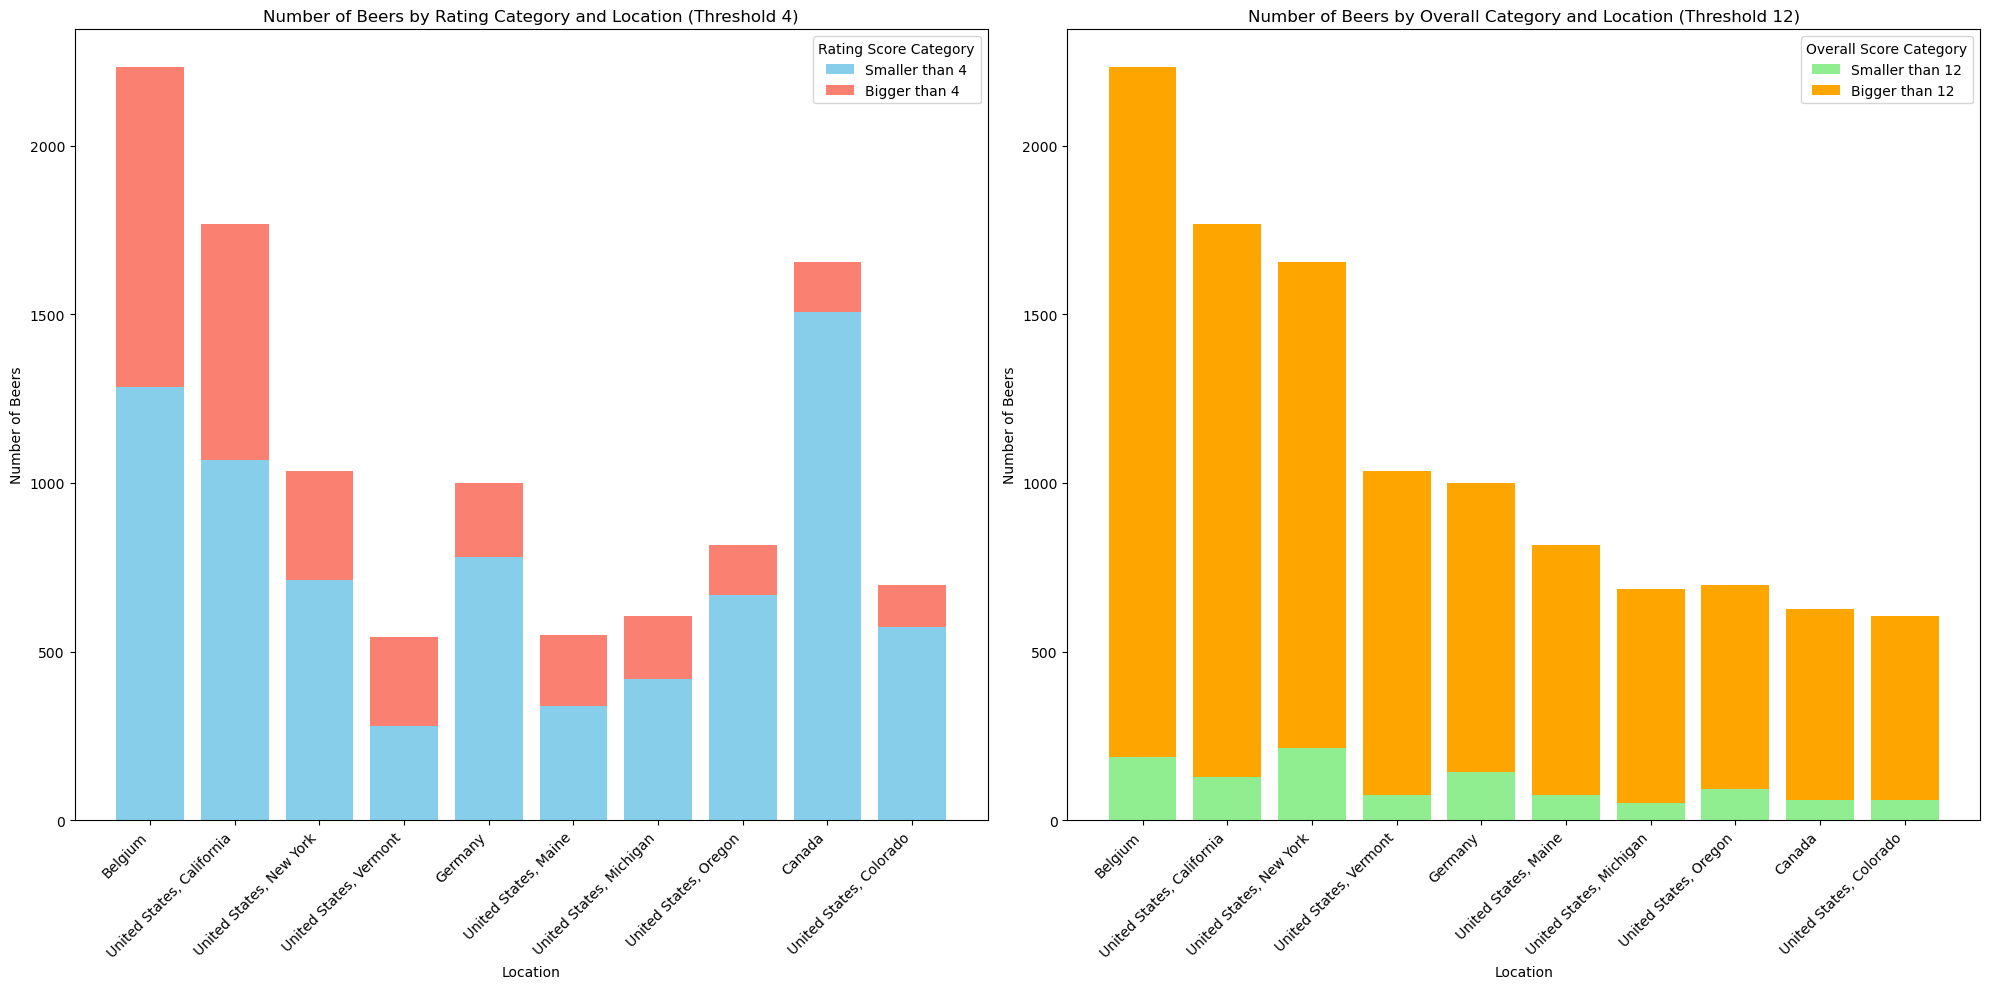

In [92]:
##Function to plot the number of beers by rating category and location for rating score
def plot_rating_and_overall_score_rb(num_countries):
    fig, axes = plt.subplots(1, 2, figsize=(20, 10))  

    ##Rating score
    #Group by 'location' and 'rating_category', count for rb and sort by the bigger than threshold category
    location_rating_counts_rb = final_df_rb.groupby(['location', 'rating_category']).size().unstack(fill_value=0).reset_index()
    location_rating_counts_rb = location_rating_counts_rb.sort_values(by=f'bigger than {threshold_rating_rb}', ascending=False)

    #Display only the top num_countries
    location_rating_counts_rb= location_rating_counts_rb.head(num_countries)
    
    #Plot the results for rating score
    x = location_rating_counts_rb['location']
    y1 = location_rating_counts_rb[f'smaller than {threshold_rating_rb}']
    y2 = location_rating_counts_rb[f'bigger than {threshold_rating_rb}']
    axes[0].bar(x, y1, label=f'Smaller than {threshold_rating_rb}', color='skyblue')
    axes[0].bar(x, y2, bottom=y1, label=f'Bigger than {threshold_rating_rb}', color='salmon')
    axes[0].set_xlabel('Location')
    axes[0].set_ylabel('Number of Beers')
    axes[0].set_title(f'Number of Beers by Rating Category and Location (Threshold {threshold_rating_rb})')
    axes[0].legend(title='Rating Score Category')
    plt.setp(axes[0].get_xticklabels(), rotation=45, ha='right')

    ##Overall Score
    #Group by 'location' and 'rating_category', count for rb and sort by the bigger than threshold category
    location_overall_counts_rb = final_df_rb.groupby(['location', 'overall_category']).size().unstack(fill_value=0).reset_index()
    location_overall_counts_rb = location_overall_counts_rb.sort_values(by=f'bigger than {threshold_overall_rb}', ascending=False)

    #Display only the top num_countries
    location_overall_counts_rb= location_overall_counts_rb.head(num_countries)

    #Plot the results for overall score
    y1 = location_overall_counts_rb[f'smaller than {threshold_overall_rb}']
    y2 = location_overall_counts_rb[f'bigger than {threshold_overall_rb}']
    axes[1].bar(x, y1, label=f'Smaller than {threshold_overall_rb}', color='lightgreen')
    axes[1].bar(x, y2, bottom=y1, label=f'Bigger than {threshold_overall_rb}', color='orange')
    axes[1].set_xlabel('Location')
    axes[1].set_ylabel('Number of Beers')
    axes[1].set_title(f'Number of Beers by Overall Category and Location (Threshold {threshold_overall_rb})')
    axes[1].legend(title='Overall Score Category')
    plt.setp(axes[1].get_xticklabels(), rotation=45, ha='right')

    plt.tight_layout()  
    plt.show()

# Initialize the slider and display the slider to manually select the value (only in Jupyter Notebooks)
n_slider_3 = IntSlider(value=10, min=1, max=final_df_rb['location'].unique().size, step=10, description='Num Countries:')
display(n_slider_3)

# Use the slider’s value as input to the function
plot_rating_and_overall_score_rb(n_slider_3.value)

# 1.2 Create personalized dataset
## 1.2.1 Load the needed datasets

In [5]:
m_beers_raw = pd.read_csv(DATA_FOLDER + 'matched_beer_data/beers.csv', sep=',', header=[0, 1])
m_breweries_raw = pd.read_csv(DATA_FOLDER + 'matched_beer_data/breweries.csv', sep=',', header=[0, 1])
m_ratings_raw = pd.read_csv(DATA_FOLDER + 'matched_beer_data/ratings.csv', sep=',', header=[0, 1])

# # BA datasets
ba_users_raw = pd.read_csv(DATA_FOLDER + 'BeerAdvocate/users.csv', sep=',', header=[0])
ba_ratings_raw = data_utils.load_dict_like_text_file(DATA_FOLDER+'matched_beer_data/ratings_with_text_ba.txt',BLK_SIZE=20_000, MAX_BLK=1_000_000)
print("Size of 'ba' ratings dataframe: %d" % ba_ratings_raw.index.size)

# # RB datasets
rb_users_raw = pd.read_csv(DATA_FOLDER + 'RateBeer/users.csv', sep=',', header=[0])
rb_ratings_raw = data_utils.load_dict_like_text_file(DATA_FOLDER+'matched_beer_data/ratings_with_text_rb.txt',BLK_SIZE=20_000, MAX_BLK=3_000_000)
print("Size of 'rb' ratings dataframe: %d" % rb_ratings_raw.index.size)


LOADED 'ratings_with_text_ba.txt'                         
Size of 'ba' ratings dataframe: 289011
LOADED 'ratings_with_text_rb.txt'                         
Size of 'rb' ratings dataframe: 1020548


Create a dataframe to show the available columns in the datasets

In [6]:
col_info = pd.DataFrame({'ba_ratings_text': pd.Series(ba_ratings_raw.columns),
            'rb_ratings_text': pd.Series(rb_ratings_raw.columns),
            'beers_ba': pd.Series(m_beers_raw['ba'].columns.unique()),
            'beers_rb': pd.Series(m_beers_raw['rb'].columns.unique()),
            'breweries': pd.Series(m_breweries_raw['ba'].columns.unique()),
            'users_ba': pd.Series(ba_users_raw.columns.unique()),
            'users_rb': pd.Series(rb_users_raw.columns.unique()),
            'matched_ratings_ba': pd.Series(m_ratings_raw['ba'].columns.unique()),
            'matched_ratings_rb': pd.Series(m_ratings_raw['rb'].columns.unique())})
col_info

,ba_ratings_text,rb_ratings_text,beers_ba,beers_rb,breweries,users_ba,users_rb,matched_ratings_ba,matched_ratings_rb
0,beer_name,beer_name,abv,abv,id,nbr_ratings,nbr_ratings,abv,abv
1,beer_id,beer_id,avg,avg,location,nbr_reviews,user_id,appearance,appearance
2,brewery_name,brewery_name,avg_computed,avg_computed,name,user_id,user_name,aroma,aroma
3,brewery_id,brewery_id,avg_matched_valid_ratings,avg_matched_valid_ratings,nbr_beers,user_name,joined,beer_id,beer_id
4,style,style,ba_score,beer_id,NaN,joined,location,beer_name,beer_name
5,abv,abv,beer_id,beer_name,NaN,location,NaN,brewery_id,brewery_id
6,date,date,beer_name,beer_wout_brewery_name,NaN,NaN,NaN,brewery_name,brewery_name
7,user_name,user_name,beer_wout_brewery_name,brewery_id,NaN,NaN,NaN,date,date
8,user_id,user_id,brewery_id,brewery_name,NaN,NaN,NaN,overall,overall
9,appearance,appearance,brewery_name,nbr_matched_valid_ratings,NaN,NaN,NaN,palate,palate


## 1.2.2 Create dataset
Analyzing and merging the reviews with text from 'ba' and 'rb' datasets for maxizing the number of ratings to be used in our analysis

In [7]:
# Only different column from rb and ba is the 'review'
# Let's dive in to see what it contains
print("------ Values of this mysterious 'review' column -------")

display(ba_ratings_raw['review'].value_counts())

print("Interesting, some of the review values are false. What does it mean? Verifying if some of the values are NaN:")
display(ba_ratings_raw[ba_ratings_raw.review == 'False'].isna().sum())
print("None of the columns contains NaN values. CONCLUSION: DROP this useless column!\n")

ba_ratings = ba_ratings_raw.copy()
rb_ratings = rb_ratings_raw.copy()
ba_ratings.drop('review', axis=1, inplace=True)
print("----- Adjusted columns for ba and rb ratings -------")
display(pd.DataFrame([ba_ratings.columns, rb_ratings_raw.columns]))


------ Values of this mysterious 'review' column -------


review
True     272814
False     16197
Name: count, dtype: int64

Interesting, some of the review values are false. What does it mean? Verifying if some of the values are NaN:


beer_name       0
beer_id         0
brewery_name    0
brewery_id      0
style           0
abv             0
date            0
user_name       0
user_id         0
appearance      0
aroma           0
palate          0
taste           0
overall         0
rating          0
text            0
review          0
dtype: int64

None of the columns contains NaN values. CONCLUSION: DROP this useless column!

----- Adjusted columns for ba and rb ratings -------


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text
1,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_name,user_id,appearance,aroma,palate,taste,overall,rating,text


---

### A. Merge rb and ba ratings with text in a single dataframe

**Before** merging, normalize all score data to have same basis (Some are over /5 /10 or even /20)!

In [8]:
# Limit floating point decimals output
pd.options.display.float_format = '{:.2f}'.format

# Perform normalization of data
# First, adjust data types to float for ratings
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']
rb_ratings[cols] = rb_ratings[cols].astype(float)
ba_ratings[cols] = ba_ratings[cols].astype(float)

print("------ RB Stats (before normalization) -------")
display(rb_ratings.describe())
print("------ BA Stats (before normalization) -------")
display(ba_ratings.describe())

# Second, normalize all scores /5 (Only 'overall', 'taste', 'aroma' are different)
rb_ratings['overall'] = rb_ratings['overall'] / 4
rb_ratings[['taste', 'aroma']] = rb_ratings[['taste', 'aroma']] / 2

print("------ RB Stats (after normalization) -------")
display(rb_ratings.describe())
print("------ BA Stats (after normalization) -------")
display(ba_ratings.describe())

# Join rb and ba users dataframe to have access to location
rb_ratings.loc[:, 'user_id'] = rb_ratings.loc[:, 'user_id'].astype(int)
rb_ratings.drop(columns=['user_name'], inplace=True)
ba_ratings.loc[:, 'user_id'] = ba_ratings.loc[:, 'user_id'].astype(str)
ba_ratings.drop(columns=['user_name'], inplace=True)
ba_users_raw.loc[:, 'user_id'] = ba_users_raw.loc[:, 'user_id'].astype(str)
rb_user_ratings = rb_ratings.join(other=rb_users_raw.set_index('user_id'), on='user_id', how='left')
ba_user_ratings = ba_ratings.join(other=ba_users_raw.set_index('user_id'), on='user_id', how='left')
rb_user_ratings.rename(columns={'location': 'location_user'}, inplace=True)
ba_user_ratings.rename(columns={'location': 'location_user'}, inplace=True)

# Join brewery also to have access to location
rb_breweries = m_breweries_raw['rb']
rb_breweries.loc[:, 'id'] = rb_breweries.loc[:, 'id'].astype(int)
rb_user_ratings.loc[:, 'brewery_id'] = rb_user_ratings.loc[:, 'brewery_id'].astype(int)
ba_breweries = m_breweries_raw['ba']
ba_breweries.loc[:,'id'] = ba_breweries.loc[:,'id'].astype(int)
ba_user_ratings.loc[:,'brewery_id'] = ba_user_ratings.loc[:,'brewery_id'].astype(int)
rb_combined_ratings = rb_user_ratings.join(other=rb_breweries.set_index('id'), on='brewery_id', how='left')
ba_combined_ratings = ba_user_ratings.join(other=ba_breweries.set_index('id'), on='brewery_id', how='left')
rb_combined_ratings.rename(columns={'location': 'location_brewery'}, inplace=True)
ba_combined_ratings.rename(columns={'location': 'location_brewery'}, inplace=True)

print("------ RB user matched df -------")
display(rb_combined_ratings.sample(2))
print("------ BA user matched df -------")
display(ba_combined_ratings.sample(2))

# Merge rb and ba with text reviews in a single dataframe
rb_combined_ratings['source'] = 'rb'
ba_combined_ratings['source'] = 'ba'

print("------ Merged dataset with adjusted ratings scores -------")
df_text_ratings = pd.concat([ba_combined_ratings, rb_combined_ratings], axis=0)
df_text_ratings.sample(5)

------ RB Stats (before normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,1020548.00,1020548.00,1020548.00,1020548.00,1020548.00,1020548.00
mean,3.50,6.66,3.37,6.72,13.70,3.40
std,0.72,1.33,0.74,1.34,2.70,0.58
min,1.00,1.00,1.00,1.00,1.00,0.50
25%,3.00,6.00,3.00,6.00,12.00,3.10
50%,3.00,7.00,3.00,7.00,14.00,3.50
75%,4.00,7.00,4.00,8.00,15.00,3.80
max,5.00,10.00,5.00,10.00,20.00,5.00


------ BA Stats (before normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,283857.00,283857.00,283857.00,283857.00,283857.00,289011.00
mean,3.91,3.83,3.83,3.86,3.87,3.86
std,0.55,0.61,0.61,0.65,0.63,0.56
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.50,3.50,3.50,3.50,3.50,3.57
50%,4.00,4.00,4.00,4.00,4.00,3.93
75%,4.25,4.25,4.25,4.25,4.25,4.22
max,5.00,5.00,5.00,5.00,5.00,5.00


------ RB Stats (after normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,1020548.00,1020548.00,1020548.00,1020548.00,1020548.00,1020548.00
mean,3.50,3.33,3.37,3.36,3.42,3.40
std,0.72,0.67,0.74,0.67,0.67,0.58
min,1.00,0.50,1.00,0.50,0.25,0.50
25%,3.00,3.00,3.00,3.00,3.00,3.10
50%,3.00,3.50,3.00,3.50,3.50,3.50
75%,4.00,3.50,4.00,4.00,3.75,3.80
max,5.00,5.00,5.00,5.00,5.00,5.00


------ BA Stats (after normalization) -------


,appearance,aroma,palate,taste,overall,rating
count,283857.00,283857.00,283857.00,283857.00,283857.00,289011.00
mean,3.91,3.83,3.83,3.86,3.87,3.86
std,0.55,0.61,0.61,0.65,0.63,0.56
min,1.00,1.00,1.00,1.00,1.00,1.00
25%,3.50,3.50,3.50,3.50,3.50,3.57
50%,4.00,4.00,4.00,4.00,4.00,3.93
75%,4.25,4.25,4.25,4.25,4.25,4.22
max,5.00,5.00,5.00,5.00,5.00,5.00


------ RB user matched df -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,overall,rating,text,nbr_ratings,user_name,joined,location_user,location_brewery,name,nbr_beers
550663,Beer Research Institute Saison DHiver,316856,Beer Research Institute,20736,Saison,6.8,1446894000,35148,4.00,3.50,...,3.50,3.50,Poured up on tap at the brewpub where it exhib...,7242.00,Ibrew2or3,1143198000.00,"United States, Arizona","United States, Arizona",Beer Research Institute,46
121203,To Øl Yeastus Christus,223949,To Øl,12119,India Pale Ale (IPA),7.4,1409479200,33419,4.00,3.50,...,4.00,3.90,"bottle, hazy orange, medium bodied. funky note...",6242.00,swoopjones,1139655600.00,"United States, New York",Denmark,To Øl,238


------ BA user matched df -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,rating,text,nbr_ratings,nbr_reviews,user_name,joined,location_user,location_brewery,name,nbr_beers
200215,Albino,178613,Liquid Riot Bottling Company,31515,American Blonde Ale,5.5,1435053600,velvetextract.414126,3.75,3.50,...,3.52,"On tap. Festival pour. Poured a murky, yellowy...",2847,2606,VelvetExtract,1263121200.00,"United States, Massachusetts","United States, Maine",Liquid Riot Bottling Company,96
210845,Grapefruit Walleye,208946,North High Brewing Company,30182,American Pale Ale (APA),4.5,1499940000,lingenbrau.591341,4.00,4.00,...,4.00,"This one gets 4's across the board. Looks, sm...",901,581,Lingenbrau,1302343200.00,"United States, California","United States, Ohio",North High Brewing Company,79


------ Merged dataset with adjusted ratings scores -------


,beer_name,beer_id,brewery_name,brewery_id,style,abv,date,user_id,appearance,aroma,...,text,nbr_ratings,nbr_reviews,user_name,joined,location_user,location_brewery,name,nbr_beers,source
156264,AleBrowar / BrauKunstKeller Herr Axolotl,353254,Himburgs BrauKunstKeller,15770,American Pale Ale,5.2,1442052000,244908,4.00,4.50,...,"Flasche, 0.3l Strohgelb-goldgelb. Fester, weiÃ...",126.00,NaN,mysland,1361012400.00,Germany,Germany,Himburgs BrauKunstKeller,42,rb
244495,The Gardener,276304,Miskatonic Brewing Company,41739,Witbier,5.3,1498644000,emerge077.17949,4.00,3.75,...,"Hazy opaque pastel canary yellow, finely textu...",6260.00,4734.00,emerge077,1113645600.00,"United States, Illinois","United States, Illinois",Miskatonic Brewing Company,34,ba
305008,Nynäshamns Bedarö Bitter,5952,Nynäshamns Ångbryggeri,1067,Premium Bitter/ESB,4.5,1184752800,19592,3.00,3.50,...,"Draught Bishop Arms, JÃ¤rntorget in GÃ¶teborg....",10056.00,NaN,Maria,1107514800.00,Denmark,Sweden,Nynäshamns Ångbryggeri,92,rb
167029,Sosus,93219,Toppling Goliath Brewing Company,23222,American Double / Imperial IPA,8.0,1481713200,cfred371.1014209,4.75,5.00,...,"SosusLook The pour is clear, but the beer come...",144.00,144.00,Cfred371,1436868000.00,"United States, Minnesota","United States, Iowa",Toppling Goliath Brewing Company,93,ba
351095,Kinn Gamleguten,207987,Kinn Bryggeri,11098,Old Ale,7.0,1378116000,271988,3.00,3.50,...,"Uklar lys brun, med beige skum. RÃ¸kt malt og ...",3940.00,NaN,Vighals,1375178400.00,Norway,Norway,Kinn Bryggeri,96,rb


---

### B. Removing duplicate reviews
Some users have the same (but different) ratings (and text review) on both rb and ba websites. After analysis of the "matched ratings" dataset, only the reviews matched for rb will be kept due to missing text reviews and ratings for the BA website.

In [9]:
m_ratings_ba = m_ratings_raw['ba']
df_text_ratings_no_duplicates = df_text_ratings.reset_index()
# Making sure user_id is of type str
m_ratings_ba.loc[:,'user_id'] = m_ratings_ba.loc[:,'user_id'].astype("string")
m_ratings_ba.loc[:,'beer_id'] = m_ratings_ba.loc[:,'beer_id'].astype(int)
df_text_ratings_no_duplicates.loc[:,'user_id'] = df_text_ratings_no_duplicates.loc[:,'user_id'].astype("string")
df_text_ratings_no_duplicates.loc[:,'beer_id'] = df_text_ratings_no_duplicates.loc[:,'beer_id'].astype(int)

count_before = df_text_ratings_no_duplicates.index.size
print("Total # of combined ratings before filtering: {0}".format(count_before))
print("Total # of duplicate ratings to remove: {0}".format(m_ratings_ba.index.size))

idx_to_drop = df_text_ratings_no_duplicates.join(m_ratings_ba.set_index(['user_id', 'beer_id']), on=['user_id','beer_id'], lsuffix='_left', how='inner').index
df_text_ratings_no_duplicates.drop(index=idx_to_drop, inplace=True)

count_after = df_text_ratings_no_duplicates.index.size
print("Total # of combined ratings after filtering: {0} --> Difference: {1}".format(count_after, count_before-count_after))

Total # of combined ratings before filtering: 1318764
Total # of duplicate ratings to remove: 21964
Total # of combined ratings after filtering: 1300486 --> Difference: 18278


#### Cleanup dataset by removing unused columns and verifying NA values

In [ ]:
# Dropping unused columns: [beer_id, brewery_id, user_id, nbr_ratings, nbr_reviews, joined, nbr_beers]
df_ratings_cleaned = df_text_ratings_no_duplicates.copy()
df_ratings_cleaned.drop(columns=['beer_id', 'brewery_id', 'user_id', 'nbr_ratings', 'nbr_reviews', 'joined', 'nbr_beers'], inplace=True)

# Adjusting ambiguous column names
df_ratings_cleaned.rename(columns={'name': 'brewery_name'}, inplace=True)
df_ratings_cleaned.drop(columns=['index'], inplace=True)

# Checking NAs
print("!----- Testing for remaining NA values in the dataframe")
display(df_ratings_cleaned.isna().sum())

# Checking empty text reviews (might cause issues)
print("!----- Testing for empty text reviews in the dataframe")
display(df_ratings_cleaned[df_ratings_cleaned.text.apply(lambda x: len(x) < 1)])
# Delete the one line found
df_ratings_cleaned.drop(df_ratings_cleaned.text.apply(lambda x: len(x) < 1).index)

# Since brewery location is not NA for the NA user, maybe it is a good approximation to use it as the user's location
print("Merging NaN users' location with location of the brewery as an approximation")
usr_loc_na_idx = df_ratings_cleaned.location_user.isna()
loc_usr_old = df_ratings_cleaned.loc[usr_loc_na_idx, 'location_user'].rename('location_user_old')
df_ratings_cleaned.loc[usr_loc_na_idx, 'location_user'] = df_ratings_cleaned.loc[usr_loc_na_idx, 'location_brewery'] 
display(pd.concat([loc_usr_old, df_ratings_cleaned.loc[usr_loc_na_idx, ['location_user', 'location_brewery']]], axis=1).rename(columns={'location_user':'location_user_new'}))

# For subcategories NAs, verify the rating and text associated with it
print("---- Investigating Na subcategories for ratings")
display(df_ratings_cleaned[df_ratings_cleaned.appearance.isna()][['appearance', 'taste', 'palate', 'aroma', 'overall', 'rating', 'text', 'source']].sample(10))
print("--> Since the ratings seem fair and the text is meaningful, these values will be kept!")

!----- Testing for remaining NA values in the dataframe


beer_name               0
brewery_name            0
style                   0
abv                     0
date                    0
appearance           4814
aroma                4814
palate               4814
taste                4814
overall              4814
rating                  0
text                    0
user_name               4
location_user       40108
location_brewery        0
brewery_name            0
source                  0
dtype: int64

Merging NaN users' location with location of the brewery as an approximation


,location_user_old,location_user_new,location_brewery
31,NaN,Northern Ireland,Northern Ireland
89,NaN,Northern Ireland,Northern Ireland
121,NaN,Northern Ireland,Northern Ireland
268,NaN,Wales,Wales
281,NaN,Wales,Wales
...,...,...,...
1318660,NaN,Kenya,Kenya
1318662,NaN,Kenya,Kenya
1318666,NaN,Kenya,Kenya
1318717,NaN,Thailand,Thailand


---- Investigating Na subcategories for ratings


,appearance,taste,palate,aroma,overall,rating,text,source
181146,NaN,NaN,NaN,NaN,NaN,4.25,Quite an excellent offering from Rock Art. Ver...,ba
19349,NaN,NaN,NaN,NaN,NaN,3.95,"plum taste is apparent, sourness is laid back....",ba
178187,NaN,NaN,NaN,NaN,NaN,5.00,An amazing imperial stout!!! I wish it was mo...,ba
24428,NaN,NaN,NaN,NaN,NaN,4.30,A Pale straw with excellent strings of bubbles...,ba
31230,NaN,NaN,NaN,NaN,NaN,4.75,Indelibly delectable,ba
70789,NaN,NaN,NaN,NaN,NaN,3.25,"Started sober, choked down my first 12oz, sipp...",ba
46174,NaN,NaN,NaN,NaN,NaN,4.10,1 PINT 6FL. OZ. bottleServed in a snifterIt is...,ba
233298,NaN,NaN,NaN,NaN,NaN,3.80,"A Perfectly clear amber, medium carbonated wi...",ba
107145,NaN,NaN,NaN,NaN,NaN,3.75,"Poured from a bottle, dated 10/17/2014, into m...",ba
83587,NaN,NaN,NaN,NaN,NaN,4.25,Good Brown Ale,ba


--> Since the ratings seem fair and the text is meaningful, these values will be kept!


#### Casting columns to desired types

In [11]:
# Casting to 'human readable' dates
df_ratings_cleaned['date'] = df_ratings_cleaned['date'].astype(int)
df_ratings_cleaned['date'] = pd.to_datetime(df_ratings_cleaned['date'], unit='s')

# string columns
cols = ['beer_name', 'brewery_name', 'style', 'user_name', 'location_user', 'location_brewery', 'text', 'source']
for c in cols:
    df_ratings_cleaned[c] = df_ratings_cleaned[c].astype(str)
# float columns
df_ratings_cleaned['abv'] = df_ratings_cleaned['abv'].astype(float)

print("!--- Datatypes verification -------")
display(df_ratings_cleaned.dtypes)
df_ratings_cleaned.sample(5)

!--- Datatypes verification -------


beer_name                   object
brewery_name                object
style                       object
abv                        float64
date                datetime64[ns]
appearance                 float64
aroma                      float64
palate                     float64
taste                      float64
overall                    float64
rating                     float64
text                        object
user_name                   object
location_user               object
location_brewery            object
brewery_name                object
source                      object
dtype: object

,beer_name,brewery_name,style,abv,date,appearance,aroma,palate,taste,overall,rating,text,user_name,location_user,location_brewery,brewery_name,source
860964,Weyerbacher Black Hole Ale,Weyerbacher Brewing Co.,Porter,7.00,2007-10-11 10:00:00,4.00,3.00,3.00,3.00,3.25,3.20,"Maybe this bottle is off? Not quite sure, Iâ...",pnista,"United States, Indiana","United States, Pennsylvania",Weyerbacher Brewing Co.,rb
356861,Volfas Engelman Rinktinis,Volfas Engelman (Olvi),Premium Lager,5.20,2012-12-11 11:00:00,4.00,3.00,2.00,2.50,2.50,2.70,Flaska. Snygg guldfÃ¤rgad Ã¶l med livligt vitt...,mzaar,Sweden,Lithuania,Volfas Engelman (Olvi),rb
573738,Nokian Keisari 2nd Avenue,Nokian Panimo,Amber Lager/Vienna,4.30,2015-04-30 10:00:00,3.00,3.00,3.00,3.00,3.00,3.00,"Aroma has grains, honey and metallic side note...",mmyohane,Finland,Finland,Nokian Panimo,rb
887794,Old Bust Head Sonic Charm,Old Bust Head Brewing Company,Imperial IPA,8.30,2017-07-03 10:00:00,4.00,3.50,4.00,3.50,4.25,3.90,Tap at City Tap in D.C. Pours copper with a ne...,bhensonb,"United States, California","United States, Virginia",Old Bust Head Brewing Company,rb
655866,Furthermore Knot Stock,Furthermore,Spice/Herb/Vegetable,5.50,2012-06-17 10:00:00,3.00,1.50,1.00,1.50,1.25,1.50,Too much black pepper in the nose and taste. ...,Beerathon,"United States, Pennsylvania","United States, Wisconsin",Furthermore,rb


----

### C. Final step: transform the following columns : [country, style, beer] for easier usage of data

Some pre-filtering is needed to match style and beers that are really close together

1. Check out location values under users

In [12]:
display(df_ratings_cleaned['location_user'].value_counts()[:10])

# Lets check out the ones  with a commma (,)
display(df_ratings_cleaned[df_ratings_cleaned['location_user'].apply(lambda x: ',' in x)].loc[:,'location_user'].unique())

# Separate States and Country (add state column, filled with N.A. if no state)
df_ratings_cleaned['country_user'] = df_ratings_cleaned['location_user'].apply(lambda x: x.split(',')[0] if len(x.split(',')) > 0 else x)
df_ratings_cleaned['country_brewery'] = df_ratings_cleaned['location_brewery'].apply(lambda x: x.split(',')[0] if len(x.split(',')) > 0 else x)
df_ratings_cleaned['state_user'] = df_ratings_cleaned['location_user'].apply(lambda x: ''.join(x.split(',')[1:]) if len(x.split(',')) > 0 else None)
df_ratings_cleaned['state_brewery'] = df_ratings_cleaned['location_brewery'].apply(lambda x: ''.join(x.split(',')[1:]) if len(x.split(',')) > 0 else None)

display(df_ratings_cleaned['country_user'].value_counts())
display(df_ratings_cleaned['state_user'].value_counts())

location_user
Canada                         101920
Denmark                         77282
United States, California       70316
England                         64029
Sweden                          53062
United States, Pennsylvania     50787
Netherlands                     42842
United States, New York         40689
United States, Illinois         40310
United States, Texas            32736
Name: count, dtype: int64

array(['United States, North Carolina', 'United States, New York',
       'United States, Illinois', 'United States, Massachusetts',
       'United States, Virginia', 'United States, South Carolina',
       'United States, Georgia', 'United States, West Virginia',
       'United States, Pennsylvania', 'United States, Alabama',
       'United States, Indiana', 'United States, Rhode Island',
       'United States, Missouri', 'United States, Arkansas',
       'United States, Louisiana', 'United States, Ohio',
       'United States, Connecticut', 'United States, Florida',
       'United States, Minnesota', 'United States, New Jersey',
       'United States, Maryland', 'United States, Alaska',
       'United States, Mississippi', 'United States, Kentucky',
       'United States, Oklahoma', 'United States, New Hampshire',
       'United States, California', 'United States, Washington',
       'United States, Wisconsin', 'United States, Oregon',
       'United States, New Mexico', 'United Sta

country_user
United States      687717
Canada             101920
Denmark             77282
England             64029
Sweden              53062
                    ...  
Palestine               1
Bouvet Island           1
Tanzania                1
Solomon Islands         1
Iraq                    1
Name: count, Length: 148, dtype: int64

state_user
                   612769
 California         70316
 Pennsylvania       50787
 New York           40689
 Illinois           40310
 Texas              32736
 Washington         29264
 Ohio               28921
 New Jersey         28042
 Florida            26670
 Colorado           25463
 Minnesota          24852
 Virginia           23871
 Massachusetts      23581
 North Carolina     19393
 Michigan           16610
 Wisconsin          16496
 Georgia            15992
 Maryland           15393
 Oregon             15252
 Indiana            12940
 Arizona            11802
 Missouri           10571
 Tennessee           9424
 Connecticut         9218
 New Hampshire       8970
 Kentucky            7813
 Iowa                7454
 Idaho               6660
 Vermont             6203
 Nevada              4678
 Alabama             4597
 South Carolina      4568
 Maine               4506
 Kansas              4175
 Louisiana           3283
 Nebraska            3009
 Rhode Island        2805
 

2. Style of the beer

In [13]:
print("There is {0} styles of beer registered in the dataset".format(df_ratings_cleaned['style'].unique().size))
display(df_ratings_cleaned['style'].unique())

# Using ChatGPT to "cluster" and identify some generic categories for a pre-filtering of the styles
category_map = data_utils.get_beer_style_mapping()
df_ratings_cleaned['style_category'] = df_ratings_cleaned['style'].map(category_map).fillna('Other')

df_ratings_cleaned['style_category'].value_counts()

There is 169 styles of beer registered in the dataset


array(['English Pale Ale', 'English Bitter', 'American Pale Wheat Ale',
       'American Double / Imperial Stout', 'Hefeweizen', 'American IPA',
       'English Porter', 'English India Pale Ale (IPA)',
       'German Pilsener', 'Kölsch', 'American Black Ale', 'Oatmeal Stout',
       'American Pale Ale (APA)', 'American Amber / Red Ale',
       'Milk / Sweet Stout', 'Saison / Farmhouse Ale',
       'Russian Imperial Stout', 'Tripel',
       'American Double / Imperial IPA', 'American Wild Ale',
       'English Stout', 'American Stout', 'Fruit / Vegetable Beer',
       'American Blonde Ale', 'Belgian Strong Pale Ale',
       'English Strong Ale', 'Old Ale',
       'Extra Special / Strong Bitter (ESB)', 'Witbier',
       'Herbed / Spiced Beer', 'English Dark Mild Ale', 'Czech Pilsener',
       'English Pale Mild Ale', 'English Brown Ale', 'Irish Red Ale',
       'Scottish Ale', 'Winter Warmer', 'Berliner Weissbier', 'Gose',
       'American Brown Ale', 'Scotch Ale / Wee Heavy', 'Euro Pale

style_category
India Pale Ale (IPA)    246235
Other                   225541
Pale Ale                148363
Belgian Ale             108842
Sour Ale                 81660
Specialty & Seasonal     65628
Stout                    64060
Saison & Farmhouse       62268
Strong Ale               52237
Lager                    44838
Wheat Beer               41225
Strong Lager             30679
Pilsner                  30341
Hybrid Styles            30101
Porter                   23644
Dark Lager               22004
Other Ales               20852
Low Alcohol               1968
Name: count, dtype: int64

3. Try to filter out same beers but written differently (upper/lower case, proposition added)

In [14]:
# TODO for milestone 3 (Maybe use tokens to identify same beer named slighlty different)

**EXPORT** the cleaned dataframe to CSV file

In [16]:
OUTPUT_FOLDER = '../data/'

df_ratings_cleaned.to_csv(OUTPUT_FOLDER + 'cleaned_ratings.csv', sep=',', header=True)
print("Dataframe exported to '{0}'!".format(OUTPUT_FOLDER + 'cleaned_ratings.csv'))

Dataframe exported to '../data/cleaned_ratings.csv'!


---

### Investigating the created dataframe containing reviews of beers by countries and styles

1. Look at the yearly and monthly distribution of data (reviews)

> This gives a glance of how the reviews are spread over the years. The monthly bar plot is independant of the years (using all the reviews)


In [87]:
# IF needed, load the cleaned dataset from .csv file
DATA_INPUT_FOLDER = "../data/"

df_ratings_cleaned = pd.read_csv(DATA_INPUT_FOLDER + "cleaned_ratings.csv", delimiter=',', header=[0], low_memory=False)

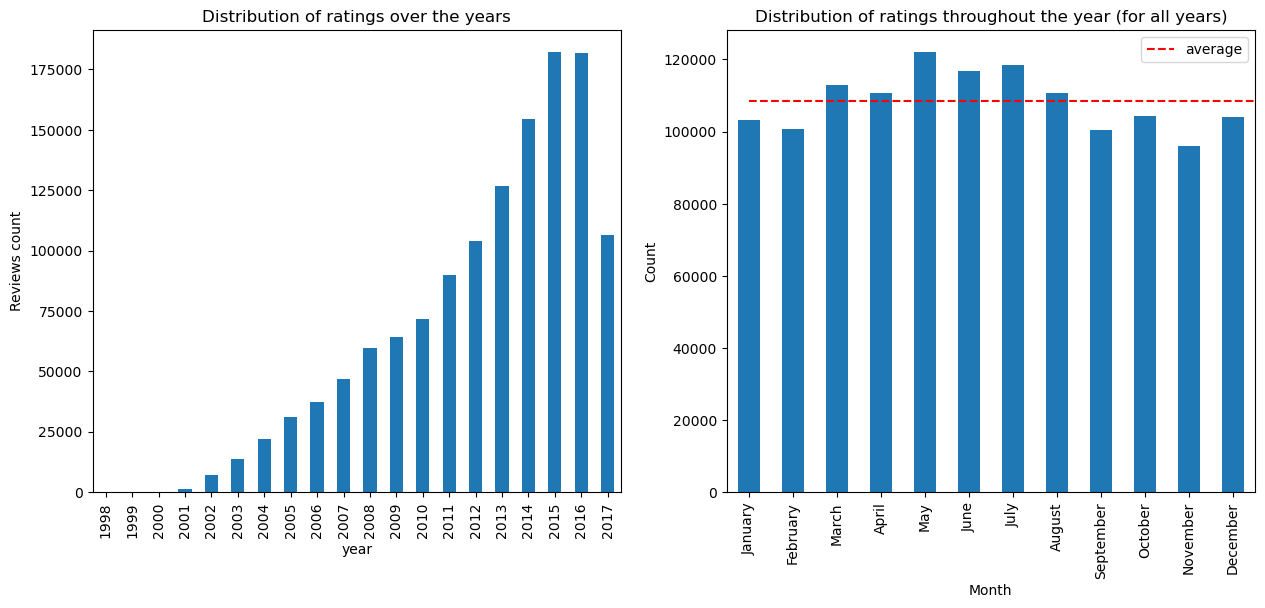

In [26]:
df_ratings_cleaned["date"] = pd.to_datetime(df_ratings_cleaned["date"])
fig, ax = plt.subplots(1,2, figsize=(15,6))
df_ratings_cleaned.groupby(df_ratings_cleaned['date'].dt.year).size().plot(kind='bar', ax=ax[0])
ax[0].set_title('Distribution of ratings over the years')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Reviews count')
df_ratings_cleaned.groupby(df_ratings_cleaned['date'].dt.month).size().plot(kind='bar', ax=ax[1])
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
ax[1].plot([0,12],[df_ratings_cleaned.groupby(df_ratings_cleaned['date'].dt.month).size().apply('mean')]*2, color='red', linestyle='--', label='average')
ax[1].set_title('Distribution of ratings throughout the year (for all years)')
ax[1].set_xticklabels(months)
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Count')
ax[1].legend()
plt.show()

Comment:
- Most reviews were made between 2013 and 2017. Later, we will use a climatic dataset, where the year 2013 will be the reference for climate.
- The number of reviews per months is pretty constant. This is good as we will do seasonal analysis of reviews. Having roughly the same number of reviews per month ensures that the data is well-equilibrated.

2. Distribution of ratings per style for a specefied country

> Here the goal is to provide quick insights of the distribution of the ratings for a selected country

Total # of ratings for Belgium: 26126


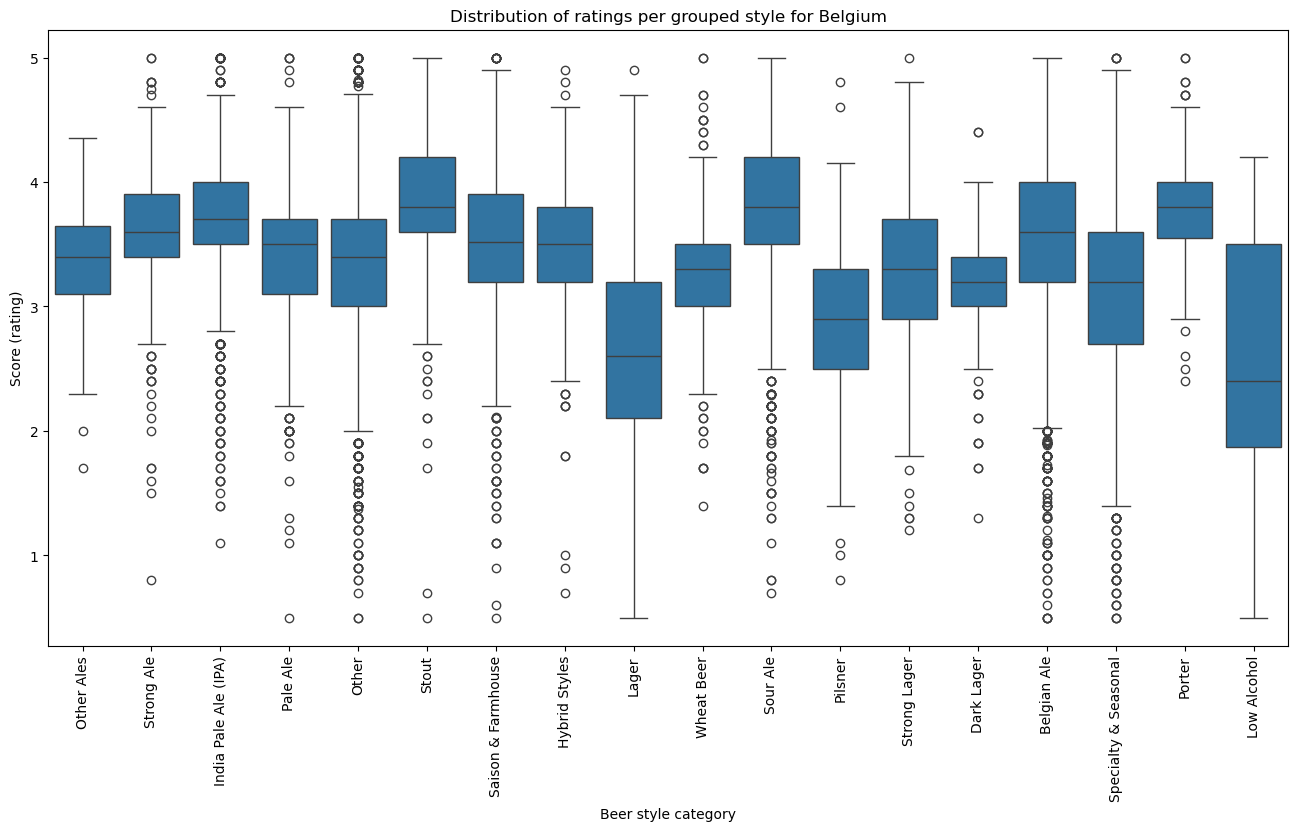

In [28]:
country = 'Belgium'
cols = ['appearance', 'aroma', 'palate', 'taste', 'overall', 'rating']

df_selected_country = df_ratings_cleaned[df_ratings_cleaned.country_user == country]

print("Total # of ratings for {0}: {1}".format(country, df_selected_country['rating'].count()))

plt.figure(figsize=(16,8))
sns.boxplot(x='style_category', y='rating', data=df_selected_country)
plt.xticks(rotation=90)
plt.title('Distribution of ratings per grouped style for {0}'.format(country))
plt.xlabel('Beer style category')
plt.ylabel('Score (rating)')
plt.show()

3. Look at best rated beer style per country

In [29]:
def get_top_n(df, group, column, n): 
    return df.groupby(group).mean().sort_values(by=column,ascending=False)[:n]

cols = ['rating', 'overall', 'palate', 'taste', 'appearance', 'aroma', 'style_category']
df_ratings_cleaned.groupby(['country_user'])[cols].apply(get_top_n, group='style_category', column='rating', n=1)[['rating', 'overall', 'palate', 'taste', 'appearance', 'aroma']]


,,rating,overall,palate,taste,appearance,aroma
country_user,style_category,,,,,,
Abkhazia,Other,4.80,5.00,5.00,4.00,5.00,5.00
Afghanistan,Strong Ale,4.40,4.75,5.00,4.00,4.00,4.00
Albania,Other,5.00,5.00,5.00,5.00,5.00,5.00
Algeria,Strong Lager,3.90,4.00,3.00,4.50,4.00,3.50
Andorra,Wheat Beer,4.69,4.75,4.75,4.75,4.75,4.50
...,...,...,...,...,...,...,...
Uruguay,Pale Ale,4.10,4.25,5.00,4.00,4.00,3.50
Venezuela,Porter,3.75,4.00,3.50,3.75,3.00,3.75
Vietnam,India Pale Ale (IPA),4.28,4.42,4.08,4.25,4.08,4.25


# 3. Geospatial analysis
## 3.1.1 Climatic data

### Chelsa Data
The image is of size (20880, 43200, 3). Axis 2 is a repetition of the value, hence we get all the information we need with a (20880, 43200) array.

From the size of the image, the coordinates system used is:

- Projection: Geographic (latitude/longitude)
- Datum: WGS84 (World Geodetic System 1984)

The resolution is 30 arc seconds. When downsampling with a kernel size of 10, the resolution is ~5 arc minutes. This represents ~9.26 kilometers at the equator (should be enough for our data analysis).


In [ ]:
# Import precipitation and temperature data
# Approximate runtime: 10 minutes
DATA_FOLDER = "../data/"
months = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12']

tmean_data = np.zeros((12, 2088, 4320))
prec_data = np.zeros((12, 2088, 4320))
tmin_data = np.zeros((12, 2088, 4320))
tmax_data = np.zeros((12, 2088, 4320))

for i, month in enumerate(months):

    tmean_file = geospatial_utils.load_geotiff(os.path.join(DATA_FOLDER, 'temp', f"CHELSA_tmean_2013_{month}_V1.2.1.tif"))
    prec_file = geospatial_utils.load_geotiff(os.path.join(DATA_FOLDER, 'prec', f"CHELSA_prec_2013_{month}_V1.2.1.tif"))

    tmean_data[i] = tmean_file
    prec_data[i] = prec_file

# Convert temperature data to [°C]
tmean_data =  np.multiply(tmean_data, 1/10) - 273.15


## 3.1.2 Geographic rasters (maps of the world and of the us)

### Natural Earth datasets have the following properties:

- has a 'geometry' column containg data of type <class 'shapely.geometry.multipolygon.MultiPolygon'>
- Datum: WGS84 but given in unit of degrees

### We download two datasets:

- *ne_110m_admin_0_countries.shp* : contains geometries of every country in the world
- *ne_50m_admin_1_states_provinces.shp* : containes geometries of regions of some big countries. We are interested in the USA.

In [ ]:
# Import world map (with region delimitation) and select desired columns
world_all = gpd.read_file(os.path.join(DATA_FOLDER, 'ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp'))
world = world_all.loc[:, ['ADMIN', 'geometry']]

# Create Dataframe containing USA states only
# We remove the states of Hawaii and Alaska for visualization purpose and because we don't need them in our analysis
states_gdf = gpd.read_file(os.path.join(DATA_FOLDER, 'ne_50m_admin_1_states_provinces/ne_50m_admin_1_states_provinces.shp'))
states_gdf_reduced = states_gdf.loc[:, ['admin', 'name', 'geometry']]
us = states_gdf_reduced[states_gdf_reduced['admin'] == 'United States of America']
us = us[us['name'] != 'Alaska']
us = us[us['name'] != 'Hawaii']

## 3.2 Geographical representation of beer preferences

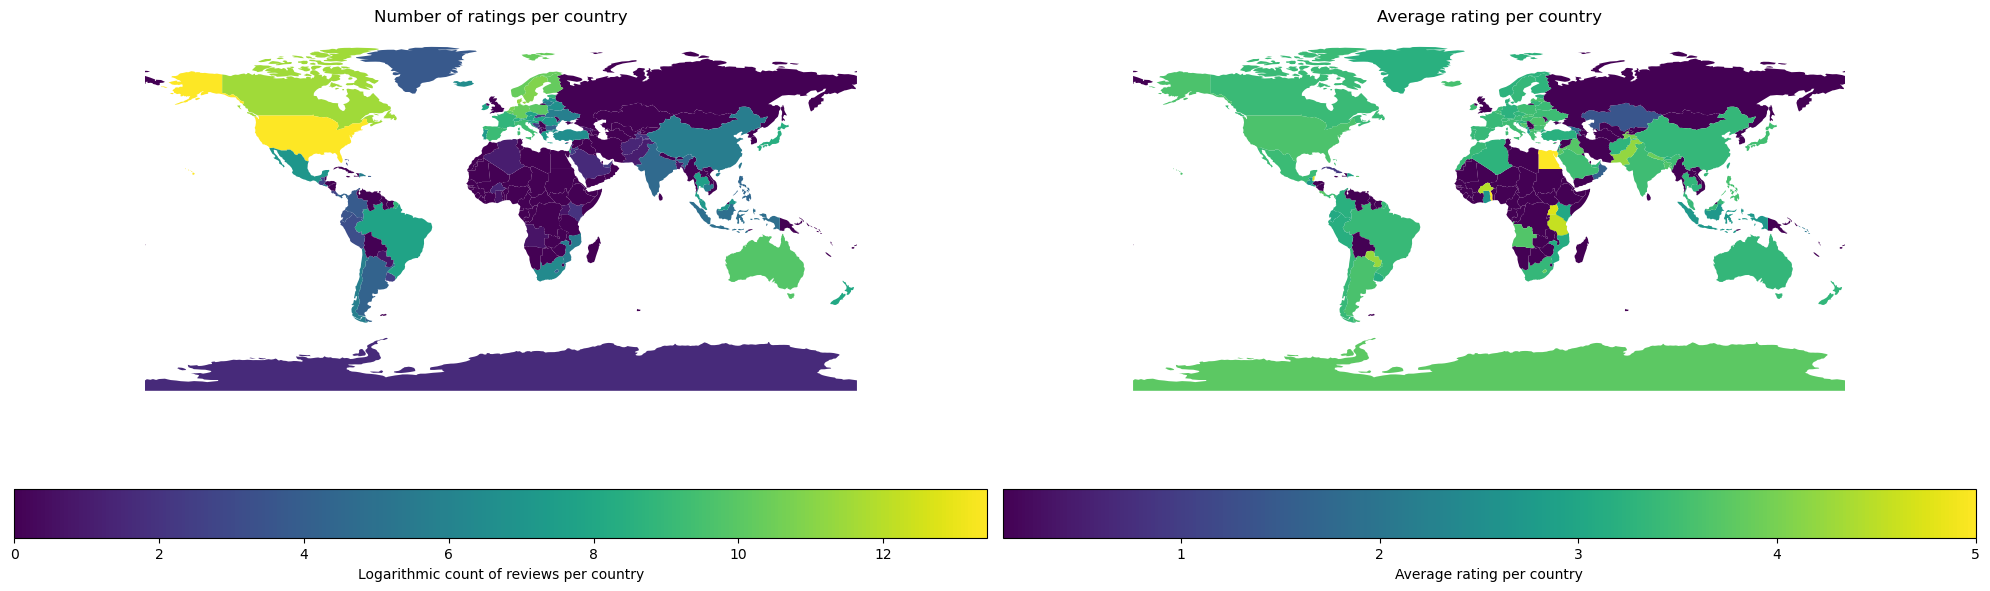

In [84]:
df = pd.read_csv(os.path.join(DATA_FOLDER, 'cleaned_ratings.csv'), low_memory=False)
geo_df = geospatial_utils.generate_geodf(df, world)
geospatial_utils.plot_geodf(geo_df)

## 3.3 Seasonal variation of temperature in Belgium

When Bob will go on his roadtrip, he wants to choose his drink according to the weather in the capital of beers! Let's look what the temperature looks like year-round in Belgium.

Run the next cell to create an animation. If it does not display well in the notebook, the animation will be saved in the folder "ouput/animations".

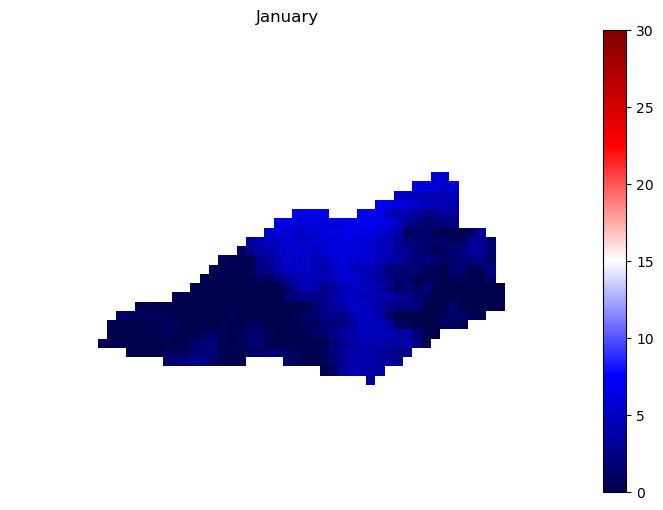

In [42]:
geospatial_utils.animation_belgium(world, tmean_data, 'temperature')

# 3.4 Weather differences across states in the USA

Next Bob visits the USA. What are the climatic differences across regions in the USA? 

To explore this question, the climatic data was interpolated across each region's geometric boundaries. An average was taken over each region to extract a single value per state.

First we generate a list of GeoDataFrame containing climatic data for each month of the year.

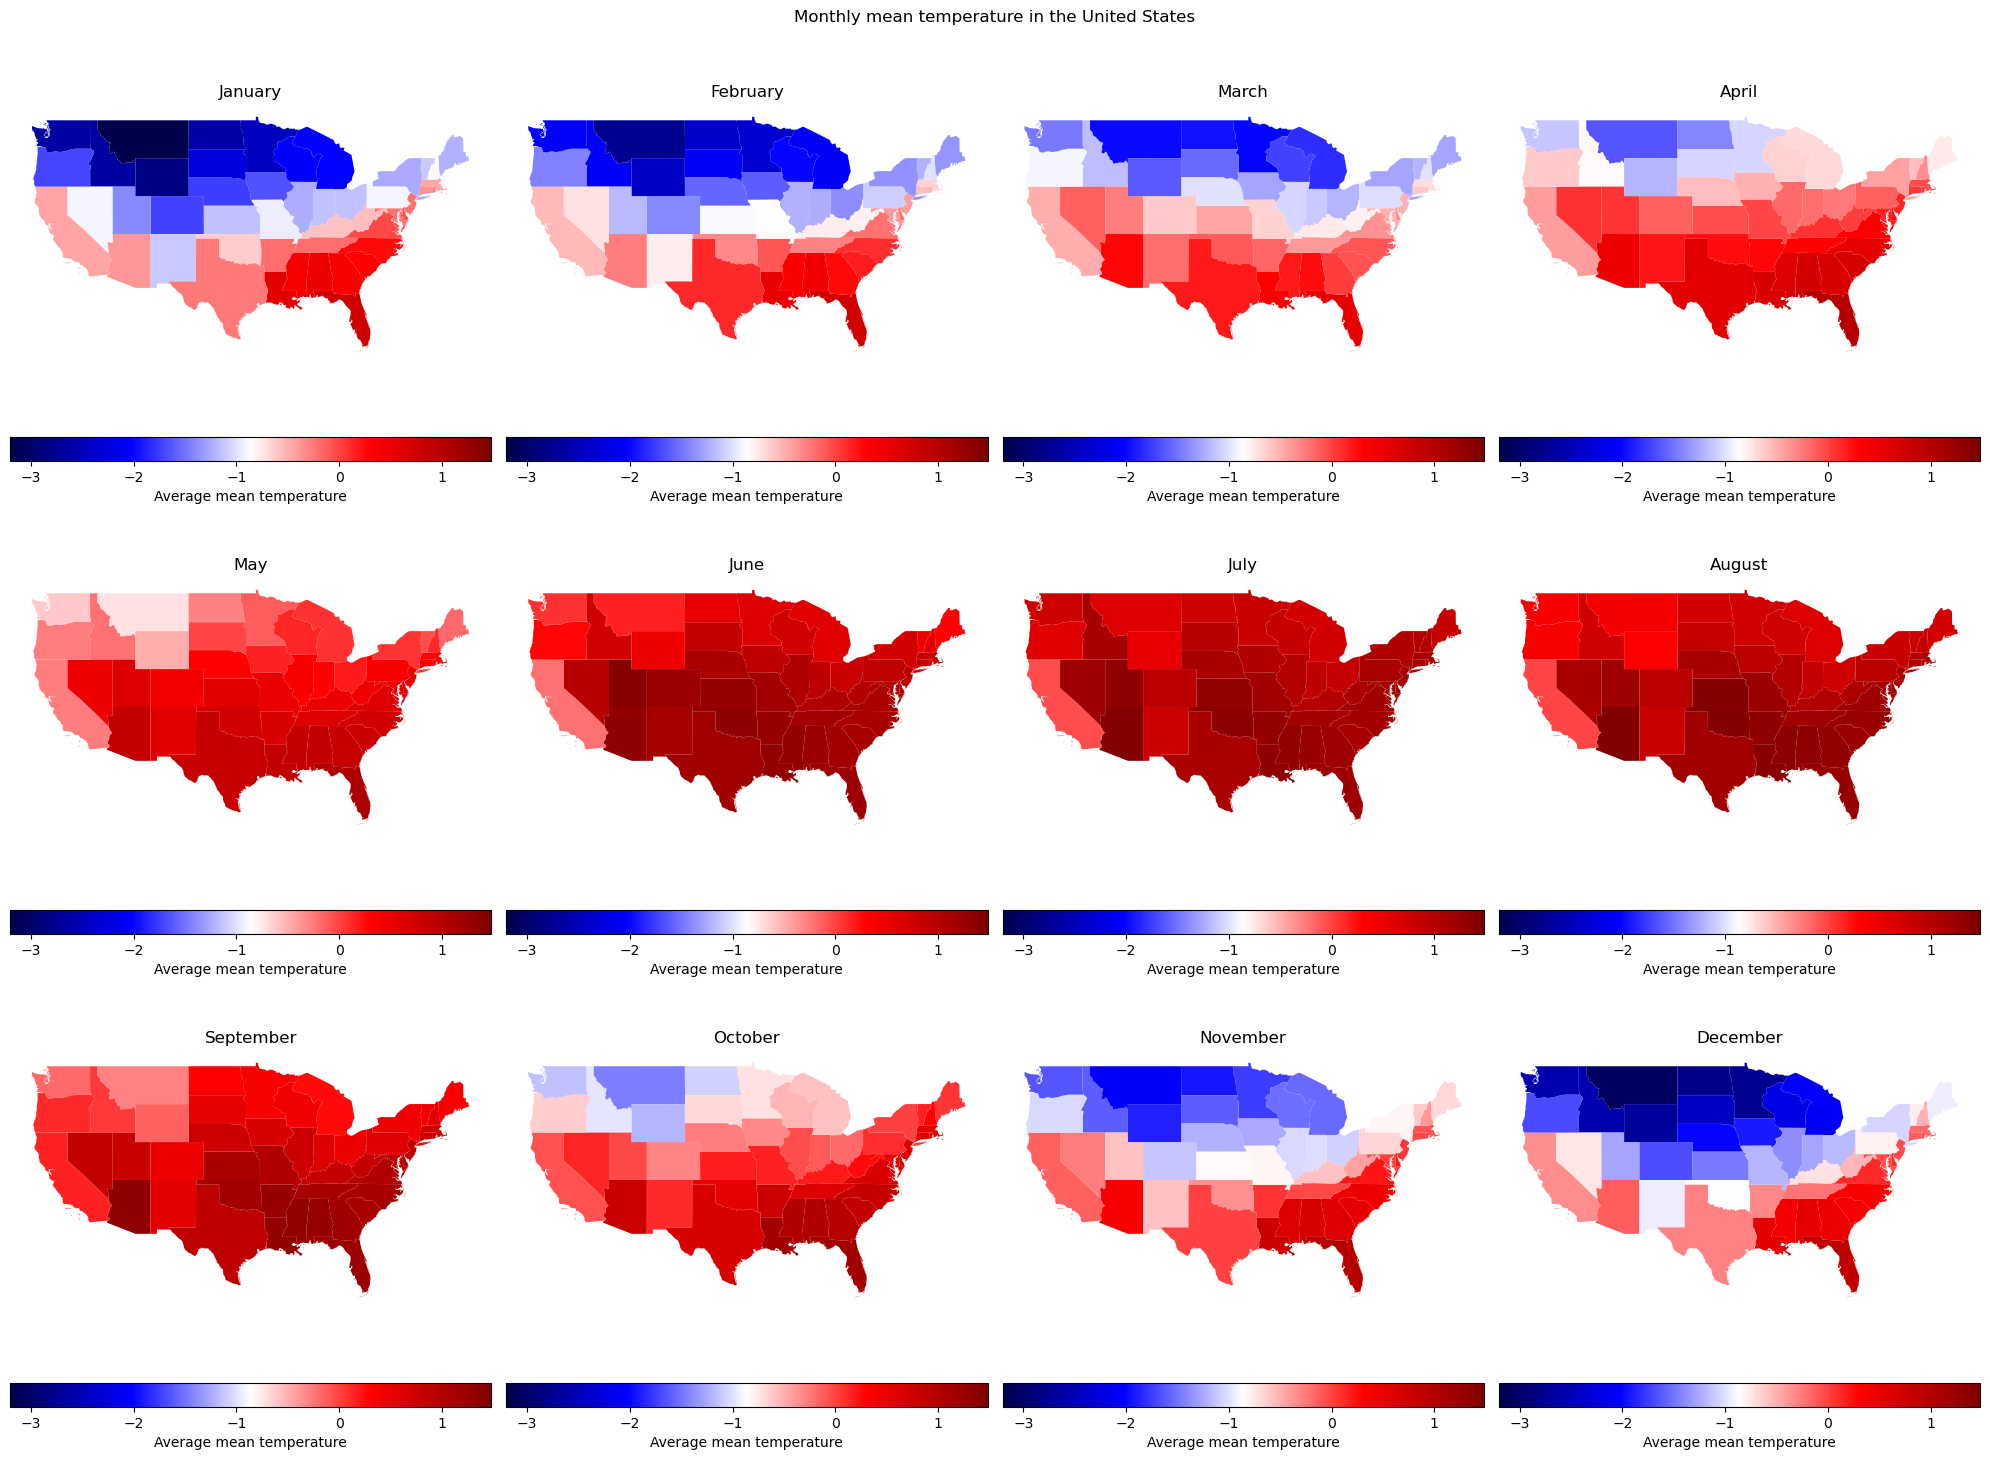

In [44]:
us_gdfs, t_stats, p_stats = geospatial_utils.generate_usgdfs(us, tmean_data, prec_data)
geospatial_utils.plot_usa(us_gdfs, 'tmean')

## 3.5. Similarity of weather between Switzerland and USA states
## 3.5.1 Interpolate climatic data in Switzerland

In [45]:
# Create vector of summary statistics for Switzerland
CH_monthly = np.zeros(24)
CH_monthly_st = np.zeros(24)

CH = world[world['ADMIN'] == 'Switzerland']

for i in range(12):

    mean_t = geospatial_utils.interpolate_temp(tmean_data[i], CH)
    mean_p = geospatial_utils.interpolate_temp(prec_data[i], CH)

    CH_monthly[i] = mean_t[0]
    CH_monthly[i + 12] = mean_p[0] 


### 3.5.2 Append it to USA data and normalize the whole data

In [46]:
_ = np.newaxis

us_comp = np.concatenate((t_stats, p_stats), axis=0)
comp_data = np.concatenate((CH_monthly[:,_], us_comp), axis=1)

av_tmean_comp = np.mean(comp_data[:12,:])
std_tmean_comp = np.std(comp_data[:12,:])
av_prec_comp = np.mean(comp_data[12:,:])
std_prec_comp = np.std(comp_data[12:,:])

comp_data_norm = np.zeros(comp_data.shape)
comp_data_norm[:12,:] = (comp_data[:12,:] - av_tmean_comp) / std_tmean_comp
comp_data_norm[12:,:] = (comp_data[12:,:] - av_prec_comp) / std_prec_comp

Then we iterate over all columns of the array, and compute the similarity score with the swiss climate. To compute similarity we use the L2 norm of the difference. The smaller the norm, the more similar the climate. Then we sort the dataframe based on the score and display the top 5 matches for Switzerland's climate.

In [ ]:
state_names = us['name']
state_names = state_names.values

best_score = 100000
best_idx = 0
scores = []

for j in range(1, comp_data_norm.shape[1]-1):
    # Compute L2 norm difference
    diff_vector = comp_data_norm[:,0] - comp_data_norm[:,j]
    score = np.linalg.norm(diff_vector)
    scores.append(score)

    if score < best_score:
        best_score = score
        best_idx = j

results = zip(state_names, scores)
df_results = pd.DataFrame(results, columns=['state_name', 'score'])

df_sorted = df_results.sort_values(by='score')
df_sorted.iloc[:5,:]


,state_name,score
32,New York,1.71
28,New Hampshire,2.05
44,Vermont,2.11
19,Maine,2.22
18,Maryland,2.22


We see that the states with the most similar climate is New York, New Hampshire, Vermont, Maine and Maryland. From what we know, this seems to make sense!